<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ1：実行準備（ライブラリの導入）</span>
</div>

* **処理（下のコードセルで実現すること）**：本コードで使用するライブラリをimportする
* **入力（実行するために必要な情報）**：無し（以下で定義済み）
* **出力（実行後に生成される成果物）**：無し（以下のライブラリを使用できるようになる）

## ＜コードの構成（下のコードセルをクリックで選択後、「shift」+「enter」キーを押すと実行できます）＞

In [1]:
#ライブラリのimport
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re 
import time
import shutil
import shap
import locale
import seaborn as sns
import matplotlib as mpl
from dateutil.relativedelta import relativedelta
from IPython.display import display, clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib.gridspec import GridSpec
from datetime import datetime
from PIL import Image

<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ2：実行準備（パスの定義）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：本コードで使用する各種データセットのパスを定義。
* **入力（実行するために必要な情報）**：無し（以下で定義済み）
* **出力（実行後に生成される成果物）**：無し（パス変数の生成）

## ＜コードの構成（下のコードセルをクリックで選択後、「shift」+「enter」キーを押すと実行できます）＞


In [31]:
#生データのパス
folder_path_zaikoMB = '生データ/在庫推移MB'
folder_path_LTMB = '生データ/所在管理MB'
folder_path_kumitate = '生データ/組立実績MB'
folder_path_tehaisu = '生データ/手配必要数'
folder_path_tehaiunyo = '生データ/手配運用情報'
folder_path_pitch = '生データ/不等ピッチ係数'
folder_path_kotei = '生データ/使用工程'
#中間成果物のパス
folder_path_interproduct = '中間成果物'
file_path_zaikodata = '中間成果物/在庫推移MBデータ_統合済.csv'
file_path_LTdata = '中間成果物/所在管理MBデータ_統合済.csv'
file_path_kumitate = '中間成果物/組立実績MBデータ_統合済.csv'
file_path_pitch = '中間成果物/不等ピッチデータ_統合済.csv'
file_path_kotei = '中間成果物/使用工程データ_統合済.csv'
file_path_date= '中間成果物/日付ファイル_開始日と終了日記載.txt'
file_path_zaikodata_extract = '中間成果物/在庫推移MBデータ_統合済&特定日時抽出済.csv'
file_path_LTdata_extract = '中間成果物/所在管理MBデータ_統合済&特定日時抽出済.csv'
file_path_kumitate_extract = '中間成果物/組立実績MBデータ_統合済&特定日時抽出済.csv'
file_path_tehaisu_with_tehaiunyo = '中間成果物/手配数データ_手配運用情報統合済'#.csvいらない
file_path_LTdata_extract_with_tehaisu = '中間成果物/所在管理MBデータ_統合済&特定日時抽出済&手配数と手配運用情報統合済.csv'
file_path_weekly_data = '中間成果物/週単位のデータ.csv'
file_path_weekly_data_with_kumitate = '中間成果物/週単位のデータ_組立統合済.csv'
file_path_weekly_data_with_kumitate_and_pitch = '中間成果物/週単位のデータ_組立&不等ピッチ統合済.csv'
file_path_weekly_data_with_kumitate_and_pitch_and_kotei = '中間成果物/週単位のデータ_組立&不等ピッチ＆使用工程統合済.csv'
file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others = '中間成果物/週単位のデータ_組立&不等ピッチ＆使用工程統合済＆必要変数追記.csv'
file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others_cleaned = '中間成果物/週単位のデータ_組立&不等ピッチ績＆使用工程統合済＆必要変数追記_クリーニング済.csv'
file_path_merged_daily_data = '中間成果物/日単位のデータ.csv'
file_path_merged_daily_data_with_others = '中間成果物/日単位のデータ_必要変数追加.csv'
#最終成果物のパス
folder_path_finalproduct = '最終成果物'

<div style="background-color:#CFF; padding: 10px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ3：データの集約（在庫推移MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：在庫推移MotionBoardから出力した１つ以上のCSVファイルを１つに集約し、新たなファイルとして保存。
* **入力（実行するために必要な情報）**：在庫推移MotionBoardから出力した１つ以上のCSVファイル（生データ/在庫推移MB/***（任意の名前）.csv）。
* **出力（実行後に生成される成果物）**：在庫推移MotionBoardから出力した１つ以上のCSVファイルを集約した単一のCSVファイル（中間成果物/在庫推移MBデータ_統合済.csv）。

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 在庫推移MotionBoardにアクセスする：[在庫推移MotionBoardリンク](http://10.88.11.58:18081/MBSF/main?id=b9154fd0-6fe6-d153-7d17-053da4c333ea&mbid=fidtnjir4nq3ja63cqcaaafmoqcx4&boardpath=%2FMSR%2F%E8%87%AA%E5%8B%95%E3%83%A9%E3%83%83%E3%82%AF%2FT403%E7%89%A9%E6%B5%81%E6%83%85%E5%A0%B1_%E5%9C%A8%E5%BA%AB%E6%8E%A8%E7%A7%BB)
2. 左上の「表示期間」で押下し、
3. 日付を選択する　※1週間以上選択すると処理落ちするみたいです。面倒ですが、１週間毎にデータを用意してください。
4. 左下の「CSV出力」を押下
5. エンコード「Shift_JIS」を選択後、「ダウンロード」を押下
6. ダウンロードしたCSVデータを指定の置き場（生データ/在庫推移MBフォルダー）に格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [3]:
# フォルダー内の全てのCSVファイルを見つける
csv_files_zaikoMB = [f for f in os.listdir(folder_path_zaikoMB) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_zaikoMB) != 0:

    # 統合結果を保存するための空のDataFrameを作成
    merged_df_zaiko = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_zaikoMB:
        file_path = os.path.join(folder_path_zaikoMB, file)
        df_zaiko = pd.read_csv(file_path, encoding='Shift_JIS')
        merged_df_zaiko = pd.concat([merged_df_zaiko, df_zaiko], ignore_index=True, sort=False)
        
    #データに重複があれば削除
    merged_df_zaiko_unique =  merged_df_zaiko.drop_duplicates(subset=['計測日時', '品番'])
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_zaikoMB)}つのCSVファイルが見つかりました！\n以下に統合したデータの一部を表示します(重複したデータは削除済みです)")

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_zaikodata, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_zaiko_unique.to_csv(f)
        
    # 不要な「Unnamed」列を削除                
    merged_df_zaiko_unique = merged_df_zaiko_unique.loc[:, ~merged_df_zaiko_unique.columns.str.contains('^Unnamed')]

    #作成したDataFrameの内容を確認
    display(merged_df_zaiko_unique)
    
# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
5つのCSVファイルが見つかりました！
以下に統合したデータの一部を表示します(重複したデータは削除済みです)


,計測日時,品番,拠点所番地,在庫数（箱）,入庫数（箱）,出庫数（箱）
0,2023/12/12 00:00:00,019120LC030,30113,14.0,0.0,0.0
1,2023/12/12 00:00:00,019120LC050,20115,5.0,0.0,0.0
2,2023/12/12 00:00:00,019120LC060,30116,13.0,0.0,0.0
3,2023/12/12 00:00:00,019120LC070,20117,14.0,0.0,0.0
4,2023/12/12 00:00:00,019128GA010,50460,24.0,0.0,1.0
...,...,...,...,...,...,...
164892,2023/12/06 23:00:00,G9201ECE010,50446,76.0,27.0,5.0
164893,2023/12/06 23:00:00,G9351ECB010,20409,NaN,NaN,NaN
164894,2023/12/06 23:00:00,G9351ECE010,20406,NaN,NaN,NaN
164895,2023/12/06 23:00:00,Y021720076*****,30121,NaN,NaN,NaN


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ4：データの集約（所在管理MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：所在管理MotionBoardから出力した１つ以上のCSVファイルを１つに集約し、新たなファイルとして保存。
* **入力（実行するために必要な情報）**：所在管理MotionBoardから出力した１つ以上のCSVファイル（生データ/所在管理MB/***（任意の名前）.csv）。
* **出力（実行後に生成される成果物）**：所在管理MotionBoardから出力した１つ以上のCSVファイルを集約した単一のCSVファイル（中間成果物/所在管理MBデータ_統合済.csv）。

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 所在管理MotionBoardにアクセス：[所在管理MotionBoardリンク](http://10.88.11.58:18081/MBSF/main?id=8045ec22-9e62-92c7-5e1e-077d35e5dc33&mbid=fidepnyfuff3ra63kitaaae3ywjmi&boardpath=%2FMSR%2F%E8%87%AA%E5%8B%95%E3%83%A9%E3%83%83%E3%82%AF%2FT403%E7%89%A9%E6%B5%81%E6%83%85%E5%A0%B1_v2)
2. 右上の「サブフィルター表示」押下
3. 整備室コード「1Y」を選択
4. 「CSVダウンロード」を押下
5. エンコード「Shift_JIS」を選択後、「ダウンロード」を押下
6. ダウンロードしたCSVデータを指定の置き場（生データ/所在管理MBフォルダー）に格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [4]:
# フォルダー内の全てのCSVファイルを見つける
csv_files_LTMB = [f for f in os.listdir(folder_path_LTMB) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_LTMB) != 0:
    
    # 統合結果を保存するための空のDataFrameを作成
    merged_df_LT = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_LTMB:
        file_path = os.path.join(folder_path_LTMB, file)
        df_LT = pd.read_csv(file_path, encoding='Shift_JIS',dtype=str)
        merged_df_LT = pd.concat([merged_df_LT, df_LT], ignore_index=True)
        
    #重複があれば削除
    merged_df_LT_unique =  merged_df_LT.drop_duplicates(subset=['かんばんシリアル', '伝票番号','品番'])

    # 不要な特定の列を削除
    merged_df_LT_unique = merged_df_LT_unique.drop("伝票番号", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("拠点所番地", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("組立投入日時", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("発注取消日時", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("発注〜組立LT", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("長期滞留フラグ", axis=1)
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_LTMB)}つのCSVファイルが見つかりました！\n以下に統合したデータの外観を示します(重複したデータは削除済みです)")

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_LTdata, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_LT_unique.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_LT_unique)

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
11つのCSVファイルが見つかりました！
以下に統合したデータの外観を示します(重複したデータは削除済みです)


,かんばんシリアル,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,納入便,発注日時,...,検収日時,順立装置入庫日時,順立装置出庫日時,回収日時,発注〜印刷LT,発注〜検収LT,発注〜順立装置入庫LT,発注〜順立装置出庫LT,発注〜回収LT,更新日時
0,1Z23H00040276,9036324A004,ﾍﾞｱﾘﾝｸﾞﾗｼﾞｱﾙﾎﾞｰﾙ,30,日本精工（株）,三河分室,回収済,2023/08/23,01,2023/08/22 03:45:04,...,2023/08/23 09:18:23,2023/08/23 16:08:59,2023/08/24 10:30:34,2023/08/24 12:18:03,0.08,1.23,1.52,2.28,2.36,2023/08/30 11:13:00
1,1Z23H00040275,9036324A003,ﾍﾞｱﾘﾝｸﾞﾗｼﾞｱﾙﾎﾞｰﾙ,22,日本精工（株）,三河分室,回収済,2023/08/23,01,2023/08/22 03:45:04,...,2023/08/23 09:18:23,2023/08/23 16:10:24,2023/08/24 11:08:10,2023/08/24 16:13:14,0.08,1.23,1.52,2.31,2.52,2023/08/30 11:13:00
2,1Z23H00040274,9030111A014,ﾘﾝｸﾞO,1000,ＮＯＫ（株）,< NULL >,回収済,2023/08/23,02,2023/08/22 01:33:45,...,2023/08/23 20:38:39,2023/08/24 03:12:24,2023/08/25 15:00:33,2023/08/26 05:37:37,0.31,1.8,2.07,3.56,4.17,2023/08/30 11:13:00
3,1Z23H00040272,35505ECB010,ﾚﾊﾞｰS/Aﾊﾟｰｷﾝｸﾞﾛｯｸ,24,中庸スプリング（株）,< NULL >,回収済,2023/08/23,01,2023/08/22 01:53:50,...,2023/08/23 07:21:29,2023/08/23 10:18:36,2023/08/25 05:06:24,2023/08/25 07:11:33,0.32,1.23,1.35,3.13,3.22,2023/08/30 11:13:00
4,1Z23H00040267,G1144ECB010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",6,住友電気工業（株）,< NULL >,回収済,2023/08/24,01,2023/08/22 04:37:54,...,2023/08/24 13:14:44,2023/08/25 00:49:55,2023/08/26 01:28:27,2023/08/26 04:34:03,1.07,2.36,2.84,3.87,4,2023/08/30 11:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592384,1Z22A00022465,9056455A035,< NULL >,< NULL >,< NULL >,< NULL >,順立装置内,< NULL >,< NULL >,< NULL >,...,< NULL >,2023/02/10 14:45:06,< NULL >,< NULL >,< NULL >,< NULL >,< NULL >,< NULL >,< NULL >,2023/08/30 11:13:00
592386,1Z22A00022456,9056455A026,< NULL >,< NULL >,< NULL >,< NULL >,順立装置出庫済,< NULL >,< NULL >,< NULL >,...,< NULL >,< NULL >,2023/02/10 13:04:26,< NULL >,< NULL >,< NULL >,< NULL >,< NULL >,< NULL >,2023/08/30 11:13:00
592387,1Z22A00022418,9056451A083,< NULL >,< NULL >,< NULL >,< NULL >,順立装置出庫済,< NULL >,< NULL >,< NULL >,...,< NULL >,2023/03/25 01:50:36,2023/03/28 12:06:08,< NULL >,< NULL >,< NULL >,< NULL >,< NULL >,< NULL >,2023/08/30 11:13:00
592388,1Z22A00022398,9056450A007,< NULL >,< NULL >,< NULL >,< NULL >,順立装置内,< NULL >,< NULL >,< NULL >,...,< NULL >,2023/03/29 19:19:10,< NULL >,< NULL >,< NULL >,< NULL >,< NULL >,< NULL >,< NULL >,2023/08/30 11:13:00


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ5：データの集約（組立実績MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：組立実績MotionBoardから出力した１つ以上のCSVファイルを１つに集約し、新たなファイルとして保存。
* **入力（実行するために必要な情報）**：組立実績MotionBoardから出力した１つ以上のCSVファイル（生データ/組立実績MB/***（任意の名前）.csv）。
* **出力（実行後に生成される成果物）**：組立実績MotionBoardから出力した１つ以上のCSVファイルを集約した単一のCSVファイル（中間成果物/組立実績MBデータ_統合済.csv）。

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. MotionBoardを開く(利用登録が必要です）：[MotionBoardリンク](http://10.88.11.113:8787/motionboard/main?mbid=fidavebv2l6yza65l6eaaagkxsvk4&boardpath=%2F%5BMy%20Boards%5D%2FAI2%2F1082794-Z100%2F%E7%B5%84%E7%AB%8B%E7%A8%BC%E5%83%8D%E7%8E%87%EF%BC%88%E5%AE%9F%E7%B8%BE%EF%BC%89)
2. マイボードで「新規作成」を押下
3. 「OK」を押下
4. 接続先「MRE_Oracle」を押下
5. 「SA」を押下
6. 「T_KANRIBAN_JISSEKI_TBL」を押下
7. 「次へ」を押下
8. 「OK」を押下
9. 「赤枠」をクリック
10. 「CSVデータをダウンロード」押下
11. エンコード「Shift_JIS」を選択後、「ダウンロード」を押下
12. ダウンロードしたCSVデータを指定の置き場（生データ/所在管理MBフォルダー）に格納する

用意したCSVデータを指定の置き場（生データ/組立実績MBフォルダー）に格納する
➀「サブフィルターを表示」押下
➁1Yを設定
➂SHIftjisでダウンロード

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [5]:
# フォルダー内の全てのCSVファイルを見つける
csv_files_kumitateMB = [f for f in os.listdir(folder_path_kumitate) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_kumitateMB) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_kumitateMB)}つのファイルが見つかりました！")

    # 統合結果を保存するための空のDataFrameを作成
    merged_df_kumitate = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_kumitateMB:
        file_path = os.path.join(folder_path_kumitate, file)
        df_kumitate = pd.read_csv(file_path, encoding='cp932')
        merged_df_kumitate = pd.concat([merged_df_kumitate, df_kumitate], ignore_index=True)
    
    #重複があれば削除
    merged_df_kumitate_unique =  merged_df_kumitate.drop_duplicates(subset=['KUMI_CD', 'LINE_DATE'])

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_kumitate, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_kumitate_unique.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_kumitate_unique[1:10])

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
11つのファイルが見つかりました！


,KUMI_CD,LINE_CD,LINE_SUB_CD,KANRIBAN_CD,LINE_DATE,TYOKU_KBN,OFFICE_HOURS,WORKING_HOURS,LINE_START_TIME,LINE_END_TIME,...,KANRIBAN_STAFF_CD,CREATE_STAFF_CD,CREATE_TIME,UPDATE_STAFF_CD,UPDATE_TIME,FIRST_SERIAL_NO,KANSEI_SHOUNIN_STAFF,AUTHOR,PDF_NAME,HUB_CD
1,S331,MA3522,A,M01,2024/01/23 00:00:00,2,690,0.0,2024/01/23 22:00:00,< NULL >,...,SYS_TT,M01,2024/01/23 08:00:06,SYS_TT,2024/01/23 08:15:01,< NULL >,< NULL >,< NULL >,< NULL >,IS000
2,S331,MA3522,A,M01,2024/01/24 00:00:00,2,690,0.0,2024/01/24 22:00:00,< NULL >,...,SYS_TT,M01,2024/01/24 08:00:03,SYS_TT,2024/01/24 08:15:01,< NULL >,< NULL >,< NULL >,< NULL >,IS000
3,S331,MA3522,A,M01,2024/01/25 00:00:00,2,690,0.0,2024/01/25 22:00:00,< NULL >,...,SYS_TT,M01,2024/01/25 08:00:04,SYS_TT,2024/01/25 08:15:01,< NULL >,< NULL >,< NULL >,< NULL >,IS000
4,S331,MA3522,A,M01,2024/01/26 00:00:00,2,690,0.0,< NULL >,< NULL >,...,M01,M01,2024/01/25 08:00:05,< NULL >,< NULL >,< NULL >,< NULL >,< NULL >,< NULL >,IS000
5,N331,MA2401,A,M04,2023/12/31 00:00:00,1,750,0.0,2023/12/31 08:30:00,< NULL >,...,SYS_TT,M04,2023/12/31 08:00:42,SYS_TT,2023/12/31 08:15:28,< NULL >,< NULL >,< NULL >,< NULL >,IN000
10,NH11,AS2650,A,M01,2023/12/27 00:00:00,1,750,428.0,2023/12/27 08:30:00,2023/12/27 18:25:00,...,31853,M01,2023/12/27 08:02:33,31853,2023/12/27 18:43:39,23M2Y13224,31853,38362,< NULL >,IN000
11,NH11,AS2650,A,M01,2023/12/28 00:00:00,1,750,429.0,2023/12/28 08:30:00,2023/12/28 17:15:00,...,31853,M01,2023/12/28 08:01:55,31853,2024/01/08 08:21:29,23M2U15054,31853,33728,< NULL >,IN000
12,NH11,AS2650,A,M01,2023/12/29 00:00:00,1,750,0.0,2023/12/29 08:30:00,< NULL >,...,SYS_TT,M01,2023/12/29 08:01:52,SYS_TT,2023/12/29 08:15:03,< NULL >,< NULL >,< NULL >,< NULL >,IN000
13,NH11,AS2650,A,M01,2023/12/30 00:00:00,1,750,0.0,2023/12/30 08:30:00,< NULL >,...,SYS_TT,M01,2023/12/30 08:02:05,SYS_TT,2023/12/30 08:15:19,< NULL >,< NULL >,< NULL >,< NULL >,IN000


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ6：データの集約（手配数）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：手配必要数CSVファイルの確認
* **入力（実行するために必要な情報）**：手配必要数CSVファイル（生データ/手配必要数/ファイル名の最初の6文字がYYYYMM.csv、例：202309_手配数_1Y_7次.csv）
* **出力（実行後に生成される成果物）**：無し（ファイルパス変数を生成）

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 手配数CSVファイルを用意する
2. 用意したCSVデータを指定の置き場（生データ/手配必要数）に格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [6]:
# フォルダー内の全てのCSVファイルを見つける
csv_files_tehaisu = [f for f in os.listdir(folder_path_tehaisu) if f.endswith('.csv')]
year_tehaisu = [file[2:4] for file in os.listdir(folder_path_tehaisu) if file.endswith(".csv")]
month_tehaisu = [file[4:6].replace("0", "") for file in os.listdir(folder_path_tehaisu) if file.endswith(".csv")]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_tehaisu) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    
    print(f"{len(csv_files_tehaisu)}つのファイルが見つかりました！")
    for i in range(len(year_tehaisu)):
        print(f"●{year_tehaisu[i]}年の{month_tehaisu[i]}月のデータが見つかりました！") 
        
# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
1つのファイルが見つかりました！
●23年の12月のデータが見つかりました！


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ7：データの集約（手配運用情報）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：手配運用情報CSVファイルの確認
* **入力（実行するために必要な情報）**：手配運用情報CSVファイル（生データ/手配必要数/ファイル名に手配運用情報YYMMが含まれる.csv、例：XR10_手配運用情報230812 1Y.csv）
* **出力（実行後に生成される成果物）**：無し（ファイルパス変数を生成）

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 手配運用情報CSVファイルを用意する
2. 用意したCSVデータを指定の置き場（生データ/手配運用情報）に格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [7]:
csv_files_tehaiunyo = [f for f in os.listdir(folder_path_tehaiunyo) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_tehaiunyo) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_tehaiunyo)}つのファイルが見つかりました！")

    pattern = r"手配運用情報(\d+)"
    results = []
    for file in csv_files_tehaiunyo:
        match = re.search(pattern, file)
        if match:
            results.append(match.group(1))

    year_tehaiunyo = [file[0:2] for file in results]
    month_tehaiunyo = [file[2:4].replace("0", "") for file in results]

    for i in range(len(year_tehaiunyo)):
        print(f"●{year_tehaiunyo[i]}年の{month_tehaiunyo[i]}月のデータが見つかりました！") 

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
1つのファイルが見つかりました！
●23年の12月のデータが見つかりました！


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ8：データの集約（不等ピッチ）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：１つ以上の不等ピッチCSVファイルを１つに集約し、新たなファイルとして保存。
* **入力（実行するために必要な情報）**：１つ以上の不等ピッチCSVファイル（生データ/不等ピッチ係数/***（任意の名前）.csv）。
* **出力（実行後に生成される成果物）**：１つ以上の不等ピッチCSVファイルを集約した単一のCSVファイル（中間成果物/不等ピッチデータ_統合済.csv）。

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 不等ピッチCSVファイルを用意する（「仕入先名」「発送場所名」「納入先」の情報を用意してください）
2. 用意したCSVデータを指定の置き場（生データ/不等ピッチ係数）に格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [8]:
csv_files_pitch = [f for f in os.listdir(folder_path_pitch) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_pitch) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_pitch)}つのファイルが見つかりました！")
    
    # 統合結果を保存するための空のDataFrameを作成
    merged_df_pitch = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_pitch:
        file_path = os.path.join(folder_path_pitch, file)
        df_pitch = pd.read_csv(file_path, encoding='Shift_JIS',dtype=str)
        merged_df_pitch = pd.concat([merged_df_pitch, df_pitch], ignore_index=True)
    
    #重複があれば削除
    merged_df_pitch_unique =  merged_df_pitch.drop_duplicates(subset=['仕入先名', '発送場所名','納入先'])
    
    # 不要な「Unnamed」列を削除                
    merged_df_pitch_unique = merged_df_pitch_unique.loc[:, ~merged_df_pitch_unique.columns.str.contains('^Unnamed')]
    
    #作成したDataFrameの内容を確認
    display(merged_df_pitch_unique[1:10])
        
    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_pitch, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_pitch_unique.to_csv(f)

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
1つのファイルが見つかりました！


,仕入先名,発送場所名,受入,納入先,不等ピッチ係数【日】
1,日本精工（株）,三河分室,1Y,カリツー西尾東経由,0.09
2,中庸スプリング（株）,NaN,1Y,カリツー西尾東経由,0.1
3,大橋鉄工（株）,NaN,1Y,カリツー西尾東経由,0
4,多摩川精機販売（株）,NaN,1Y,カリツー西尾東経由,0
5,石黒ゴム工業（株）,NaN,1Y,カリツー西尾東経由,0.29
6,新光ゴム工業（株）,本社,1Y,安城第1工場直納,0
7,小川工業（株）,NaN,1Y,カリツー西尾東経由,0.05
8,住友電装（株）,NaN,1Y,カリツー西尾東経由,0
9,住友電装（株）,四日市物流センター,1Y,安城第1工場直納,0


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ9：データの集約（使用工程）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：１つ以上の使用工程CSVファイルを１つに集約し、新たなファイルとして保存。
* **入力（実行するために必要な情報）**：１つ以上の使用工程CSVファイル（生データ/使用工程/***（任意の名前）.csv）。
* **出力（実行後に生成される成果物）**：１つ以上の使用工程CSVファイルを集約した単一のCSVファイル（中間成果物/使用工程データ_統合済.csv）。

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 使用工程CSVファイルを用意する（「品番」「使用工程」の情報を用意してください）
2. 用意したCSVデータを指定の置き場（生データ/使用工程）に格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [9]:
csv_files_kotei = [f for f in os.listdir(folder_path_kotei) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_kotei) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_kotei)}つのファイルが見つかりました！")
    
    # 統合結果を保存するための空のDataFrameを作成
    merged_df_kotei = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_kotei:
        file_path = os.path.join(folder_path_kotei, file)
        df_kotei = pd.read_csv(file_path, encoding='Shift_JIS',dtype=str)
        merged_df_kotei = pd.concat([merged_df_kotei, df_kotei], ignore_index=True)
    
    #重複があれば削除
    merged_df_kotei_unique =  merged_df_kotei.drop_duplicates(subset=['品番'])
    
    #作成したDataFrameの内容を確認
    display(merged_df_kotei_unique)
        
    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_kotei, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_kotei_unique.to_csv(f)

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
1つのファイルが見つかりました！


,品番,使用工程
0,34989ECE030,NaN
1,9036340A010,NaN
2,35145ECE020,2.MGケース
3,33490ECB010,7.ファイナル前半
4,33490ECE010,7.ファイナル前半
...,...,...
143,9036652A004,1.デフ・大物ギヤ・Brg
144,9036628A007,1.デフ・大物ギヤ・Brg
145,9036630A017,1.デフ・大物ギヤ・Brg
146,9036628A006,1.デフ・大物ギヤ・Brg


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ10：データの抽出（特定日時入力）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ユーザーにキーボード入力を要求し、特定の日付範囲を入力
* **入力（実行するために必要な情報）**：任意の日付範囲（ユーザーのキーボード入力）
* **出力（実行後に生成される成果物）**：入力した日付範囲を記録したテキストファイル（中間成果物/日付ファイル_開始日と終了日記載.txt）


## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [10]:
# ユーザーからの入力を受け付けて特定の日付範囲のDataFrameを取り出す
start_date_input = input("You：開始日を入力してください（YYYY-MM-DD）: ")
end_date_input = input("You：終了日を入力してください（YYYY-MM-DD）: ")

#日付範囲の記録用ファイル作成
with open(file_path_date, 'w') as file:
    file.write("開始日:"+start_date_input)
    file.write("\n")
    file.write("終了日:"+end_date_input)

You：開始日を入力してください（YYYY-MM-DD）:  2023-12-01
You：終了日を入力してください（YYYY-MM-DD）:  2023-12-15


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ11：データの確認（在庫推移MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ3で生成した「中間成果物/在庫推移MBデータ_統合済.csv」から特定日付範囲のデータを抽出し、新しいファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/在庫推移MBデータ_統合済.csv
* **出力（実行後に生成される成果物）**：特定日付範囲のデータを抽出した在庫推移MBデータ_統合済.csv（中間成果物/在庫推移MBデータ_統合済&特定日時抽出済.csv）


## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [11]:
#中間成果物をダウンロード
merged_df_zaiko_unique = pd.read_csv(file_path_zaikodata,encoding='shift_jis')

# datetime型に変換する
merged_df_zaiko_unique['計測日時'] = pd.to_datetime(merged_df_zaiko_unique['計測日時'], errors='coerce')

# 入力された日付をdatetime型に変換
start_date = pd.to_datetime(start_date_input).date()
end_date = pd.to_datetime(end_date_input).date()

# 特定の日付範囲のDataFrameを取り出す
merged_df_zaiko2 = merged_df_zaiko_unique[(merged_df_zaiko_unique["計測日時"].dt.date >= start_date) & (merged_df_zaiko_unique["計測日時"].dt.date <= end_date)]

# 特定の日付範囲外のデータが存在するかチェック
# 条件を満たす行が存在する場合の処理
if not merged_df_zaiko2.empty:

    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print("入力した日付範囲のデータを表示します")
    
    #インデックスを振り直す
    merged_df_zaiko2.reset_index(drop=True, inplace=True)

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_zaikodata_extract, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_zaiko2.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_zaiko2)

# 条件を満たす行が存在しない場合の処理
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("入力した日付範囲が存在しません！入力した日付もしくはデータを確認してください！")

実行は成功しました！
次のステップを実行してください!
入力した日付範囲のデータを表示します


,Unnamed: 0,計測日時,品番,拠点所番地,在庫数（箱）,入庫数（箱）,出庫数（箱）,Unnamed: 0.1
0,0,2023-12-12 00:00:00,019120LC030,30113,14.0,0.0,0.0,NaN
1,1,2023-12-12 00:00:00,019120LC050,20115,5.0,0.0,0.0,NaN
2,2,2023-12-12 00:00:00,019120LC060,30116,13.0,0.0,0.0,NaN
3,3,2023-12-12 00:00:00,019120LC070,20117,14.0,0.0,0.0,NaN
4,4,2023-12-12 00:00:00,019128GA010,50460,24.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...
116760,164892,2023-12-06 23:00:00,G9201ECE010,50446,76.0,27.0,5.0,NaN
116761,164893,2023-12-06 23:00:00,G9351ECB010,20409,NaN,NaN,NaN,NaN
116762,164894,2023-12-06 23:00:00,G9351ECE010,20406,NaN,NaN,NaN,NaN
116763,164895,2023-12-06 23:00:00,Y021720076*****,30121,NaN,NaN,NaN,NaN


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ12：データの確認（所在管理MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ4で生成した「中間成果物/所在管理MBデータ_統合済.csv」から特定日付範囲のデータを抽出し、新しいファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/所在管理MBデータ_統合済.csv
* **出力（実行後に生成される成果物）**：特定日付範囲のデータを抽出した所在管理MBデータ_統合済.csv（中間成果物/所在管理MBデータ_統合済&特定日時抽出済.csv）

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [12]:
#中間成果物をダウンロード
merged_df_LT_unique = pd.read_csv(file_path_LTdata,encoding='shift_jis')

# datetime型に変換する
#merged_df_LT_unique['検収日時'] = pd.to_datetime(merged_df_LT_unique['検収日時'], errors='coerce')
merged_df_LT_unique['納入日'] = pd.to_datetime(merged_df_LT_unique['納入日'], errors='coerce') 

# 入力された日付をdatetime型に変換
start_date = pd.to_datetime(start_date_input).date()
end_date = pd.to_datetime(end_date_input).date()

# 特定の日付範囲のDataFrameを取り出す
merged_df_LT2 = merged_df_LT_unique[(merged_df_LT_unique["納入日"].dt.date >= start_date) & (merged_df_LT_unique["納入日"].dt.date <= end_date)]

# 日付範囲内のデータが存在するかチェック
if not merged_df_LT2.empty:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print("入力した日付範囲（納入日）で検収されたかんばんデータを表示します")
    
    #インデックスを振り直す
    merged_df_LT2.reset_index(drop=True, inplace=True)

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_LTdata_extract, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_LT2.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_LT2)

# 条件を満たす行が存在しない場合の処理
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("入力した日付範囲（納入日）が存在しません！入力した日付もしくはデータを確認してください！")

/anaconda/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


実行は成功しました！
次のステップを実行してください!
入力した日付範囲（納入日）で検収されたかんばんデータを表示します


,Unnamed: 0,かんばんシリアル,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,納入便,...,検収日時,順立装置入庫日時,順立装置出庫日時,回収日時,発注〜印刷LT,発注〜検収LT,発注〜順立装置入庫LT,発注〜順立装置出庫LT,発注〜回収LT,更新日時
0,296195,1Z23M00007075,35771ECB010,ｼｬﾌﾄｱｳﾄﾌﾟｯﾄ,4,アイシン機工（株）,吉良工場,回収済,2023-12-05,05,...,2023/12/06 02:51:40,2023/12/06 05:09:43,2023/12/06 09:14:27,2023/12/06 12:13:38,0.38,1.14,1.24,1.41,1.53,2023/12/06 12:13:38
1,296196,1Z23M00007074,35771ECB010,ｼｬﾌﾄｱｳﾄﾌﾟｯﾄ,4,アイシン機工（株）,吉良工場,回収済,2023-12-05,05,...,2023/12/06 02:51:40,2023/12/06 05:06:51,2023/12/06 09:14:36,2023/12/06 12:13:38,0.38,1.14,1.24,1.41,1.53,2023/12/06 12:13:38
2,296197,1Z23M00007072,35771ECB010,ｼｬﾌﾄｱｳﾄﾌﾟｯﾄ,4,アイシン機工（株）,吉良工場,回収済,2023-12-05,05,...,2023/12/06 02:51:40,2023/12/06 05:07:41,2023/12/06 09:43:00,2023/12/06 12:13:38,0.38,1.14,1.24,1.43,1.53,2023/12/06 12:13:38
3,296198,1Z23M00006977,35771ECB010,ｼｬﾌﾄｱｳﾄﾌﾟｯﾄ,4,アイシン機工（株）,吉良工場,回収済,2023-12-05,05,...,2023/12/06 02:51:40,2023/12/06 05:09:28,2023/12/06 10:05:09,2023/12/06 12:13:38,0.38,1.14,1.24,1.44,1.53,2023/12/06 12:13:38
4,296199,1Z23M00005897,35771ECE010,ｼｬﾌﾄｱｳﾄﾌﾟｯﾄ,6,アイシン機工（株）,吉良工場,回収済,2023-12-05,03,...,2023/12/05 18:23:39,2023/12/06 00:50:11,2023/12/06 09:15:25,2023/12/06 12:13:38,0.39,1.17,1.44,1.79,1.92,2023/12/06 12:13:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23918,414667,1Z23M00006645,39171ECB010,"ｶﾊﾞｰ,ﾓｰﾀﾊｳｼﾞﾝｸﾞ",16,（株）アイシン福井,本社工場,回収済,2023-12-05,08,...,2023/12/05 22:50:27,2023/12/05 22:12:17,2023/12/06 10:06:25,2023/12/06 12:13:39,0.28,1.24,1.21,1.71,1.79,2023/12/06 12:13:39
23919,414668,1Z23M00004552,35141ECE010,ｹ-ｽT/A,20,（株）アイシン福井,本社工場,回収済,2023-12-04,19,...,2023/12/05 03:45:30,2023/12/05 03:09:23,2023/12/06 10:37:39,2023/12/06 12:13:39,2.19,2.9,2.87,4.18,4.25,2023/12/06 12:13:39
23920,414669,1Z23M00004266,35141ECE010,ｹ-ｽT/A,20,（株）アイシン福井,本社工場,回収済,2023-12-04,17,...,2023/12/05 03:45:30,2023/12/05 00:38:09,2023/12/06 09:24:09,2023/12/06 12:13:39,2.19,2.97,2.84,4.2,4.32,2023/12/06 12:13:39
23921,414670,1Z23M00003430,9034108A010,ﾌﾟﾗｸﾞｳｲｽﾞﾍﾂﾄﾞｽﾄﾚ-ﾄｽｸﾘﾕ-,1000,（株）杉浦製作所,NaN,回収済,2023-12-04,02,...,2023/12/04 18:14:25,2023/12/04 22:07:13,2023/12/06 01:49:12,2023/12/06 12:13:39,0.13,2.68,2.84,4,4.43,2023/12/06 12:13:39


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ13：データの確認（組立実績MB）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ5で生成した「中間成果物/組立実績MBデータ_統合済.csv」から特定日付範囲のデータを抽出し、新しいファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/組立実績MBデータ_統合済.csv
* **出力（実行後に生成される成果物）**：特定日付範囲のデータを抽出した組立実績MBデータ_統合済.csv（中間成果物/組立実績MBデータ_統合済&特定日時抽出済.csv）

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [13]:
#中間成果物をダウンロード
merged_df_kumitate_unique = pd.read_csv(file_path_kumitate,encoding='shift_jis')

# datetime型に変換する
merged_df_kumitate_unique['LINE_DATE'] = pd.to_datetime(merged_df_kumitate_unique['LINE_DATE'], errors='coerce')

# 入力された日付をdatetime型に変換
start_date = pd.to_datetime(start_date_input).date()
end_date = pd.to_datetime(end_date_input).date()

# 特定の日付範囲のDataFrameを取り出す
merged_df_kumitate2 = merged_df_kumitate_unique[(merged_df_kumitate_unique["LINE_DATE"].dt.date >= start_date) & (merged_df_kumitate_unique["LINE_DATE"].dt.date <= end_date)]

# 日付範囲内のデータが存在するかチェック
if not merged_df_kumitate2.empty:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print("入力した日付範囲のデータを表示します")
    
    #インデックスを振り直す
    merged_df_kumitate2.reset_index(drop=True, inplace=True)
    
    # 不要な「Unnamed」列を削除                
    merged_df_kumitate2 = merged_df_kumitate2.loc[:, ~merged_df_kumitate2.columns.str.contains('^Unnamed')]

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_kumitate_extract, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_kumitate2.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_kumitate2)

# 条件を満たす行が存在しない場合の処理
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("入力した日付範囲が存在しません！入力した日付もしくはデータを確認してください！")

実行は成功しました！
次のステップを実行してください!
入力した日付範囲のデータを表示します


,KUMI_CD,LINE_CD,LINE_SUB_CD,KANRIBAN_CD,LINE_DATE,TYOKU_KBN,OFFICE_HOURS,WORKING_HOURS,LINE_START_TIME,LINE_END_TIME,...,KANRIBAN_STAFF_CD,CREATE_STAFF_CD,CREATE_TIME,UPDATE_STAFF_CD,UPDATE_TIME,FIRST_SERIAL_NO,KANSEI_SHOUNIN_STAFF,AUTHOR,PDF_NAME,HUB_CD
0,S712,AS3420,A,M01,2023-12-08,1,750,424.0,2023/12/08 08:30:00,2023/12/08 17:15:00,...,30388,M01,2023/12/08 08:01:58,30388,2023/12/08 18:06:23,Rr147733,30388,9L021,< NULL >,IS000
1,S741,AS3460,A,M01,2023-12-01,1,750,428.0,2023/12/01 08:35:00,2023/12/01 17:15:00,...,46039,M01,2023/12/01 08:02:25,46039,2023/12/01 18:30:30,551632,22446,46039,< NULL >,IS000
2,S741,AS3460,A,M01,2023-12-02,1,750,0.0,2023/12/02 08:30:00,< NULL >,...,SYS_TT,M01,2023/12/02 08:01:55,SYS_TT,2023/12/02 08:15:05,< NULL >,< NULL >,< NULL >,< NULL >,IS000
3,S741,AS3460,A,M01,2023-12-03,2,690,0.0,2023/12/03 22:00:00,< NULL >,...,SYS_TT,M01,2023/12/03 08:02:02,SYS_TT,2023/12/03 08:15:29,< NULL >,< NULL >,< NULL >,< NULL >,IS000
4,S741,AS3460,A,M01,2023-12-04,2,690,506.0,2023/12/04 22:00:00,2023/12/05 08:15:00,...,1,M01,2023/12/04 08:01:56,1,2023/12/05 19:40:46,634731,22446,46039,< NULL >,IS000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,N512,AS1519,A,M01,2023-12-11,2,690,434.0,2023/12/11 22:00:00,2023/12/12 06:50:00,...,22814,M01,2023/12/11 08:00:08,22814,2023/12/14 17:11:13,10500,22814,43945,< NULL >,IN000
4151,N512,AS1519,A,M01,2023-12-12,2,690,434.0,2023/12/12 22:00:00,2023/12/13 06:50:00,...,22814,M01,2023/12/12 08:00:07,22814,2023/12/14 17:15:35,12068,22814,43945,< NULL >,IN000
4152,N512,AS1519,A,M01,2023-12-13,2,690,434.0,2023/12/13 22:00:00,2023/12/14 06:50:00,...,22814,M01,2023/12/13 08:00:07,22814,2023/12/14 17:17:35,13691,22814,43945,< NULL >,IN000
4153,N512,AS1519,A,M01,2023-12-14,2,690,434.0,2023/12/14 22:00:00,2023/12/15 06:50:00,...,22814,M01,2023/12/14 08:00:05,22814,2023/12/15 13:41:20,15329,22814,43945,< NULL >,IN000


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ14：データの確認（手配数＆手配運用情報）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：入力した特定の日付範囲の手配数＆手配運用情報が存在するかの確認
* **入力（実行するために必要な情報）**：無し（ステップ6,7実行時に作成した変数を利用）
* **出力（実行後に生成される成果物）**：無し（成功/失敗メッセージ）

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [14]:
#日付範囲の計算
year_diff = end_date.year - start_date.year
month_diff = end_date.month - start_date.month
total_months =  year_diff * 12 + month_diff + 1
print(f"あなたが入力した日付範囲は{total_months}ヶ月分です")

#年単位、月単位で分割するためのリスト準備
input_years = []
input_months = []

#実行動作の確認
flag_count = 0

#データの確認
start_date_temp = start_date
for i in range(total_months):
    input_year = str(start_date_temp.year)[2:]
    input_month = start_date_temp.month
    start_date_temp = start_date_temp + relativedelta(months=i+1)
    print(f"{i+1}ヶ月目：{input_year}年{input_month}月のデータが存在するか確認します")
    
    input_years.append(input_year)
    input_months.append(input_month)
    
    flag = 0
    for j in range(len(csv_files_tehaisu)):
        if (int(input_year) == int(year_tehaisu[j])) and (int(input_month) == int(month_tehaisu[j])):
            flag = 1
    if flag == 1:
        print("\033[34m" + "実行は成功しました!" + "\033[0m")
        print("手配必要数あります")
        flag_count = flag_count + 1
    elif flag == 0:
        #失敗メッセージ
        print("\033[31m" + "実行は失敗しました！" + "\033[31m")
        print(f"{input_year}年{input_month}月の手配数ありません")
        
    flag = 0
    for j in range(len(csv_files_tehaiunyo)):
        if (int(input_year) == int(year_tehaiunyo[j])) and (int(input_month) == int(month_tehaiunyo[j])):
            flag = 1
    if flag == 1:
        #成功メッセージ
        print("\033[34m" + "実行は成功しました！" + "\033[0m")
        print("手配運用情報あります")
        flag_count = flag_count + 1
    elif flag == 0:
        #失敗メッセージ
        print("\033[31m" + "実行は失敗しました！" + "\033[31m")
        print(f"{input_year}年{input_month}月の手配運用情報ありません")
        
print("----結果を表示します-----")
    
if flag_count/2 == total_months:
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print("入力した日付範囲の手配数ファイルと手配運用情報ファイルは存在します")
    flag_count = flag_count + 1
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("入力した日付範囲の手配数ファイルor手配運用情報ファイルは存在しません。出力スクリプトを確認してください")

あなたが入力した日付範囲は1ヶ月分です
1ヶ月目：23年12月のデータが存在するか確認します
実行は成功しました!
手配必要数あります
実行は成功しました！
手配運用情報あります
----結果を表示します-----
実行は成功しました！
次のステップを実行してください!
入力した日付範囲の手配数ファイルと手配運用情報ファイルは存在します


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ15：データの統合</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：年と月が一致する場合、手配数CSVファイルを手配運用情報CSVファイルに統合し、新たなファイルに保存
* **入力（実行するために必要な情報）**：手配必要数CSVファイル（生データ/手配必要数/ファイル名の最初の6文字がYYYYMM.csv、例；202309_手配数_1Y_7次.csv）、手配運用情報CSVファイル（生データ/手配必要数/ファイル名に手配運用情報YYMMが含まれる.csv、例；XR10_手配運用情報230812 1Y.csv）
* **出力（実行後に生成される成果物）**：手配数と手配運用情報を統合したCSVファイル(中間成果物/手配数データ_手配運用情報統合済.csv)

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [16]:
# 空のリストを初期化。後でマッチした年と月を記録します。
year_match = []
month_match = []

# 'csv_files_tehaisu'内の各ファイルに対して繰り返し処理を行います。
index_tehaisu = 0
for file in csv_files_tehaisu:
    # ファイルのフルパスを結合します。
    file_path = os.path.join(folder_path_tehaisu, file)
    # 手配数データを読み込んでDataFrameを作成します。
    tehaisudata = pd.read_csv(file_path,  skiprows=9, encoding='Shift_JIS', dtype=str)
    # 列名のクリーニングを行います。
    tehaisudata.columns = [col.replace("=", "").replace('"', '') for col in tehaisudata.columns]
    # データのクリーニングを行います。
    tehaisudata_cleaned = tehaisudata.applymap(lambda x: x.replace('=', '').replace('"', '') if isinstance(x, str) else x)
    # インデックス初期化
    index_tehaiunyo = 0
    # 'csv_files_tehaiunyo'内の各ファイルに対して繰り返し処理を行います。
    for file in csv_files_tehaiunyo:
        #確認用（通常実行はマスク）
        #print(month_tehaisu[index_tehaisu], month_tehaiunyo[index_tehaiunyo])
        # ファイルのフルパスを結合します。
        file_path = os.path.join(folder_path_tehaiunyo, file)
        # 手配運用データを読み込んでDataFrameを作成します。
        tehaiunyodata = pd.read_csv(file_path, skiprows=9, encoding='cp932', dtype=str)
        # 列名のクリーニングを行います。
        tehaiunyodata.columns = [col.replace("=", "").replace('"', '') for col in tehaiunyodata.columns]
        # データのクリーニングを行います。
        tehaiunyodata_cleaned = tehaiunyodata.applymap(lambda x: x.replace('=', '').replace('"', '') if isinstance(x, str) else x)
        # 年と月が一致する場合の処理を行います。
        if (year_tehaisu[index_tehaisu] == year_tehaiunyo[index_tehaiunyo]) and (month_tehaisu[index_tehaisu] == month_tehaiunyo[index_tehaiunyo]):
            #　成功メッセージ
            print(f"{year_tehaiunyo[index_tehaiunyo]}年{month_tehaiunyo[index_tehaiunyo]}月のデータを統合します")
            print("統合した結果を以下に示します")
            # 手配数データの行長さを取得します。
            long_tehaisu = tehaisudata_cleaned.iloc[:,1]
            # 手配運用データの行長さを取得します。
            long_tehaiunyo = tehaiunyodata_cleaned.iloc[:,1]
            # 手配数データの各行に対して繰り返し処理を行います。
            for i in range(len(long_tehaisu)):
                # 品番名から空白を削除します。
                hinban_tehaisu = tehaisudata_cleaned.loc[i, '品番'].replace("-", "").replace(" ", "")
                # 手配運用データの各行に対して繰り返し処理を行います。
                for j in range(len(long_tehaiunyo)):
                    # 品番名から空白を削除します。
                    hinban_tehaiunyo = tehaiunyodata_cleaned.loc[j, '品番'].replace('-', '').replace(' ', '')
                    # 品番が一致する場合、手配数データに手配運用データを統合します。
                    if hinban_tehaisu == hinban_tehaiunyo:
                        tehaisudata_cleaned.loc[i, "納入回数（間隔）"] = int(tehaiunyodata_cleaned.loc[j, "納入ｻｲｸﾙ.間隔"])
                        tehaisudata_cleaned.loc[i, "納入回数（回数）"] = int(tehaiunyodata_cleaned.loc[j, "納入ｻｲｸﾙ.回数"])
                        tehaisudata_cleaned.loc[i, "納入回数（遅れ）"] = float(tehaiunyodata_cleaned.loc[j, "納入ｻｲｸﾙ.情報"])
                        tehaisudata_cleaned.loc[i, "箱重量"] = float(tehaiunyodata_cleaned.loc[j, "総重量(Kg)"])
                        tehaisudata_cleaned.loc[i, "手配数一致行"] = i
                        tehaisudata_cleaned.loc[i, "手配運用情報一致行"] = j
                        tehaisudata_cleaned.loc[i, "手配数一致品番"] = hinban_tehaisu
                        tehaisudata_cleaned.loc[i, "手配運用情報一致品番"] = hinban_tehaiunyo
                
        # 手配運用データのインデックスをインクリメントします。
        index_tehaiunyo = index_tehaiunyo + 1
    
    # 統合したデータを新しいCSVファイルに保存します。
    file_new = file_path_tehaisu_with_tehaiunyo + year_tehaisu[index_tehaisu] + month_tehaisu[index_tehaisu] + ".csv"
    with open(file_new, mode='w', newline='', encoding='shift_jis', errors='ignore') as f:
        tehaisudata_cleaned.to_csv(f)
    
    # 年と月のマッチング情報をリストに追加します。
    year_match.append(year_tehaisu[index_tehaisu])
    month_match.append(month_tehaisu[index_tehaisu])
        
    # 手配数データのインデックスをインクリメントします。
    index_tehaisu = index_tehaisu + 1
    
    # 統合したデータフレームを表示します。
    display(tehaisudata_cleaned)

23年12月のデータを統合します
統合した結果を以下に示します


,品番,加工図符号,設変符号,品名,ステータス,発注区分,整備室,整備室名,手配区分,工程内外製,...,30(土).1,31(日).1,納入回数（間隔）,納入回数（回数）,納入回数（遅れ）,箱重量,手配数一致行,手配運用情報一致行,手配数一致品番,手配運用情報一致品番
0,35300-ECB010,,A,"PUMP ASSY, OIL W/MOTOR",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,0,0,1.0,4.0,8.04,6.97,0.0,0.0,35300ECB010,35300ECB010
1,35580-ECB011,,B,"ACTUATOR ASSY, SHIFT CONTROL",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,0,0,1.0,4.0,8.04,10.68,1.0,3.0,35580ECB011,35580ECB011
2,1040 052 001Z,,D,"PLUG, W/HEAD STRAIGHT SCREW",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,0,0,1.0,6.0,5.76,6.27,2.0,4.0,1040052001Z,1040052001Z
3,1040 183 011P,,C,"BOLT, FLANGE",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,0,0,1.0,6.0,5.76,9.38,3.0,5.0,1040183011P,1040183011P
4,3040 052 001B,,C,"PLUG, W/HEAD STRAIGHT SCREW",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,0,0,1.0,6.0,5.76,11.97,4.0,6.0,3040052001B,3040052001B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,G1259-ECB010,,,"RUBBER, MOTOR COOLING PIPE",使用中,かんばん,1Y,第１工場,直送,Ｐ,...,0,0,1.0,1.0,1.00,0.00,377.0,557.0,G1259ECB010,G1259ECB010
378,G1126-ECB010,,A,"MAGNET, MOTOR ROTOR",使用中,かんばん,1Y,第１工場,直送,Ｐ,...,0,0,1.0,1.0,1.00,8.01,378.0,558.0,G1126ECB010,G1126ECB010
379,G1126-ECE010,,A,"MAGNET, MOTOR ROTOR",使用中,かんばん,1Y,第１工場,直送,Ｐ,...,0,0,1.0,1.0,1.00,11.51,379.0,559.0,G1126ECE010,G1126ECE010
380,36296-ECB010,,,CAP,使用中,かんばん,1Y,第１工場,直送,Ｐ,...,0,0,1.0,1.0,1.00,0.00,380.0,560.0,36296ECB010,36296ECB010


In [34]:
#中間成果物をダウンロード
zaikodata = pd.read_csv(file_path_zaikodata_extract,encoding='shift_jis')

# '計測日時'をdatatime型に変換
zaikodata['計測日時'] = pd.to_datetime(zaikodata['計測日時'], errors='coerce')

# 時間が8:30未満の場合、日付を1日減らす
zaikodata['計測日時（8:30開始）'] = zaikodata.apply(lambda row: row['計測日時'] 
                               - pd.Timedelta(days=1) if row['計測日時'].time() < pd.to_datetime('08:30').time() else row['計測日時'], axis=1)
# 曜日の整数値を取得（月曜=0, 日曜=6）
zaikodata['曜日_番号'] = zaikodata['計測日時（8:30開始）'].dt.dayofweek
# 曜日の名前に変換するためのマッピング
days = {0: '月曜日', 1: '火曜日', 2: '水曜日', 3: '木曜日', 4: '金曜日', 5: '土曜日', 6: '日曜日'}
# 曜日の番号を曜日の名前にマッピング
zaikodata['曜日_名前'] = zaikodata['曜日_番号'].map(days)


# 不要な「Unnamed」列を削除                
zaikodata = zaikodata.loc[:, ~zaikodata.columns.str.contains('^Unnamed')]

#　成功メッセージ
print("計測日時開始を昼勤開始時刻にします")

# 加工したデータフレームを表示します。
display(zaikodata)

#日ごとにグループ化し、'在庫数（箱）', '入庫数（箱）', '出庫数（箱）'を計算
zaikodata['年_計測日時（8:30開始）'] = zaikodata['計測日時（8:30開始）'].dt.year
zaikodata['月_計測日時（8:30開始）'] = zaikodata['計測日時（8:30開始）'].dt.month
zaikodata['週番号_計測日時（8:30開始）'] = zaikodata['計測日時（8:30開始）'].dt.week#isocalendar().week#1個目
zaikodata['日_計測日時（8:30開始）'] = zaikodata['計測日時（8:30開始）'].dt.day
daily_zaikodata = zaikodata.groupby(['品番', '年_計測日時（8:30開始）', '月_計測日時（8:30開始）',
                                     '週番号_計測日時（8:30開始）', '日_計測日時（8:30開始）','曜日_番号','曜日_名前']).agg({'在庫数（箱）': 'median','入庫数（箱）': 'sum','出庫数（箱）': 'sum'}).reset_index()
#列名の変更
daily_zaikodata = daily_zaikodata.rename(columns={'在庫数（箱）': '在庫数（箱）_1日の中央値'})
daily_zaikodata = daily_zaikodata.rename(columns={'入庫数（箱）': '入庫数（箱）_1日の合計値'})
daily_zaikodata = daily_zaikodata.rename(columns={'出庫数（箱）': '出庫数（箱）_1日の合計値'})

#　成功メッセージ
print("日次の在庫データをを以下に示します")

# 加工したデータフレームを表示します。
display(daily_zaikodata)

#列名の変更
daily_zaikodata = daily_zaikodata.rename(columns={'年_計測日時（8:30開始）': '年'})
daily_zaikodata = daily_zaikodata.rename(columns={'月_計測日時（8:30開始）': '月'})
daily_zaikodata = daily_zaikodata.rename(columns={'週番号_計測日時（8:30開始）': '週番号'})
daily_zaikodata = daily_zaikodata.rename(columns={'日_計測日時（8:30開始）': '日'})

# 加工したデータフレームを表示します。
display(daily_zaikodata)

計測日時開始を昼勤開始時刻にします


,計測日時,品番,拠点所番地,在庫数（箱）,入庫数（箱）,出庫数（箱）,計測日時（8:30開始）,曜日_番号,曜日_名前
0,2023-12-12 00:00:00,019120LC030,30113,14.0,0.0,0.0,2023-12-11 00:00:00,0,月曜日
1,2023-12-12 00:00:00,019120LC050,20115,5.0,0.0,0.0,2023-12-11 00:00:00,0,月曜日
2,2023-12-12 00:00:00,019120LC060,30116,13.0,0.0,0.0,2023-12-11 00:00:00,0,月曜日
3,2023-12-12 00:00:00,019120LC070,20117,14.0,0.0,0.0,2023-12-11 00:00:00,0,月曜日
4,2023-12-12 00:00:00,019128GA010,50460,24.0,0.0,1.0,2023-12-11 00:00:00,0,月曜日
...,...,...,...,...,...,...,...,...,...
116760,2023-12-06 23:00:00,G9201ECE010,50446,76.0,27.0,5.0,2023-12-06 23:00:00,2,水曜日
116761,2023-12-06 23:00:00,G9351ECB010,20409,NaN,NaN,NaN,2023-12-06 23:00:00,2,水曜日
116762,2023-12-06 23:00:00,G9351ECE010,20406,NaN,NaN,NaN,2023-12-06 23:00:00,2,水曜日
116763,2023-12-06 23:00:00,Y021720076*****,30121,NaN,NaN,NaN,2023-12-06 23:00:00,2,水曜日


日次の在庫データをを以下に示します


,品番,年_計測日時（8:30開始）,月_計測日時（8:30開始）,週番号_計測日時（8:30開始）,日_計測日時（8:30開始）,曜日_番号,曜日_名前,在庫数（箱）_1日の中央値,入庫数（箱）_1日の合計値,出庫数（箱）_1日の合計値
0,019120LC030,2023,11,48,30,3,木曜日,15.0,0.0,4.0
1,019120LC030,2023,12,48,1,4,金曜日,15.0,9.0,9.0
2,019120LC030,2023,12,48,2,5,土曜日,13.0,0.0,0.0
3,019120LC030,2023,12,48,3,6,日曜日,13.0,0.0,0.0
4,019120LC030,2023,12,49,4,0,月曜日,14.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...
5270,Y021782011*****,2023,12,50,11,0,月曜日,2.0,2.0,0.0
5271,Y021782011*****,2023,12,50,12,1,火曜日,NaN,0.0,0.0
5272,Y021782011*****,2023,12,50,13,2,水曜日,1.0,1.0,0.0
5273,Y021782011*****,2023,12,50,14,3,木曜日,1.0,1.0,0.0


,品番,年,月,週番号,日,曜日_番号,曜日_名前,在庫数（箱）_1日の中央値,入庫数（箱）_1日の合計値,出庫数（箱）_1日の合計値
0,019120LC030,2023,11,48,30,3,木曜日,15.0,0.0,4.0
1,019120LC030,2023,12,48,1,4,金曜日,15.0,9.0,9.0
2,019120LC030,2023,12,48,2,5,土曜日,13.0,0.0,0.0
3,019120LC030,2023,12,48,3,6,日曜日,13.0,0.0,0.0
4,019120LC030,2023,12,49,4,0,月曜日,14.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...
5270,Y021782011*****,2023,12,50,11,0,月曜日,2.0,2.0,0.0
5271,Y021782011*****,2023,12,50,12,1,火曜日,NaN,0.0,0.0
5272,Y021782011*****,2023,12,50,13,2,水曜日,1.0,1.0,0.0
5273,Y021782011*****,2023,12,50,14,3,木曜日,1.0,1.0,0.0


In [35]:
#daily_zaikodataに手配系データを結合する

# 各月に対して処理を行うためのループ
# total_months, input_years, input_monthsは事前に定義されたリスト
maxlong = total_months*len(daily_zaikodata)
counter = 0

#入力したデータ範囲内の月分回す
for m in range(total_months):
    input_year = input_years[m]#年
    input_month = input_months[m]#月
    #特定の年月の手配系データパスを生成
    file_path = file_path_tehaisu_with_tehaiunyo + str(input_year) + str(input_month) + ".csv"
    print(file_path)
    # 手配数データのCSVファイルを読み込み
    tehaisudata = pd.read_csv(file_path, encoding='Shift_JIS', dtype=str)
    # daily_zaikodataの各行に対して処理を行うループ
    for i in range(len(daily_zaikodata)):
        #-----処理の進捗率を表示
        clear_output(wait=True)
        print(f"進捗率(%): {((counter+1)/maxlong)*100}")
        counter += 1
        time.sleep(0.00000001)#最小限の待機？
        if counter == maxlong:
            print("終了しました")
        #-----処理の進捗率、終了
        # 指定された年と月が一致する場合のみ処理を行う
        
        if (int(str(daily_zaikodata.loc[i,'年'])[2:]) == int(input_years[m])) and (int(daily_zaikodata.loc[i,'月']) == int(input_months[m])):
            #hinban_daily_zaikodata側の処理
            hinban_daily_zaikodata = daily_zaikodata.loc[i,'品番'].replace("-", "").replace(" ", "")# 品番を取り出し、不要な文字を削除
            # tehaisudataの各行に対して処理を行うループ
            for j in range(len(tehaisudata)):
                hinban_tehai = tehaisudata.loc[j,'品番'].replace('-', '').replace(' ', '')# 品番を取り出し、不要な文字を削除
                if hinban_daily_zaikodata == hinban_tehai:
                    #print(hinban_daily_zaikodata,hinban_tehai)
                    daily_zaikodata.loc[i,"納入回数（間隔）"] = tehaisudata.loc[j,"納入回数（間隔）"]
                    daily_zaikodata.loc[i,"納入回数（回数）"] = tehaisudata.loc[j,"納入回数（回数）"]
                    daily_zaikodata.loc[i,"納入回数（遅れ）"] = tehaisudata.loc[j,"納入回数（遅れ）"]
                    daily_zaikodata.loc[i,"箱重量"] = tehaisudata.loc[j,"箱重量"]
                    daily_zaikodata.loc[i,"箱種類"] = tehaisudata.loc[j,"箱種類"]
                    daily_zaikodata.loc[i,"基準在庫日数"] = tehaisudata.loc[j,"基準在庫日数"]
                    daily_zaikodata.loc[i,"基準在庫枚数"] = tehaisudata.loc[j,"基準在庫枚数"]
                    daily_zaikodata.loc[i,"収容数"] = int(str(tehaisudata.loc[j,"収容数"]).replace(',', ''))
                    day = daily_zaikodata.loc[i,'日']
                    index = tehaisudata.columns.get_loc("翌々々月稼働日数") + day
                    daily_zaikodata.loc[i,'日量数'] = int(str(tehaisudata.iloc[j,index]).replace(',', ''))
                    daily_zaikodata.loc[i,'日量数（箱数）'] = float(daily_zaikodata.loc[i,'日量数']) /int(daily_zaikodata.loc[i, '収容数'])#週ごとのMAX
                    if int(str(tehaisudata.loc[j,'当月必要数']).replace(',', '')) != 0:
                        avenichiryo = int(str(tehaisudata.loc[j,'当月必要数']).replace(',', ''))/float(tehaisudata.loc[j,'当月稼働日数'])
                        daily_zaikodata.loc[i,'月平均日量数'] = avenichiryo
                        daily_zaikodata.loc[i,'月平均日量数（箱数）'] = avenichiryo/int(daily_zaikodata.loc[i, '収容数'])
                        daily_zaikodata.loc[i,'基準在庫枚数（日数）'] = (int(float(tehaisudata.loc[j,'基準在庫枚数']))*int(daily_zaikodata.loc[i, '収容数']))/avenichiryo
                        daily_zaikodata.loc[i,'基準在庫日数（基準在庫枚数込み）']= float(daily_zaikodata.loc[i,"基準在庫日数"]) + float(daily_zaikodata.loc[i,'基準在庫枚数（日数）'])
                        break
                    else:
                        daily_zaikodata.loc[i,'月平均日量数'] = 0
                        daily_zaikodata.loc[i,'月平均日量数（箱数）'] = 0
                        daily_zaikodata.loc[i,'基準在庫枚数（日数）'] = 0
                        daily_zaikodata.loc[i,'基準在庫日数（基準在庫枚数込み）']= float(daily_zaikodata.loc[i,"基準在庫日数"])
                        break


# 不要な「Unnamed」列を削除                
daily_zaikodata = daily_zaikodata.loc[:, ~daily_zaikodata.columns.str.contains('^Unnamed')]

#　成功メッセージ
print("日次の在庫データ+手配系データを以下に示します")

# 加工したデータフレームを表示します。
display(daily_zaikodata)

進捗率(%): 100.0
終了しました
日次の在庫データ+手配系データを以下に示します


,品番,年,月,週番号,日,曜日_番号,曜日_名前,在庫数（箱）_1日の中央値,入庫数（箱）_1日の合計値,出庫数（箱）_1日の合計値,...,箱種類,基準在庫日数,基準在庫枚数,収容数,日量数,日量数（箱数）,月平均日量数,月平均日量数（箱数）,基準在庫枚数（日数）,基準在庫日数（基準在庫枚数込み）
0,019120LC030,2023,11,48,30,3,木曜日,15.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,019120LC030,2023,12,48,1,4,金曜日,15.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,019120LC030,2023,12,48,2,5,土曜日,13.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,019120LC030,2023,12,48,3,6,日曜日,13.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,019120LC030,2023,12,49,4,0,月曜日,14.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5270,Y021782011*****,2023,12,50,11,0,月曜日,2.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5271,Y021782011*****,2023,12,50,12,1,火曜日,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5272,Y021782011*****,2023,12,50,13,2,水曜日,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5273,Y021782011*****,2023,12,50,14,3,木曜日,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#daily_zaikodata+手配系データ+かんばんLTを結合する

#中間成果物をダウンロード
df_LT = pd.read_csv(file_path_LTdata_extract,encoding='shift_jis')
df_LT_kaisyu = pd.read_csv(file_path_LTdata,encoding='shift_jis')#統合LTデータ（※検収時間で抽出する前）を活用して回収かんばん数を計算する
df_kumitate = pd.read_csv(file_path_kumitate_extract,encoding='shift_jis')
df_pitch = pd.read_csv(file_path_pitch,encoding='shift_jis')
df_kotei = pd.read_csv(file_path_kotei,encoding='shift_jis')

#-----データの時間処理：開始

# '納入日'をdatetime型に変換し、年と月、週番号、日の列を追加
df_LT['納入日'] = pd.to_datetime(df_LT['納入日'], errors='coerce')
df_LT['年_納入'] = df_LT['納入日'].dt.year
df_LT['月_納入'] = df_LT['納入日'].dt.month
df_LT['週番号_納入'] = df_LT['納入日'].dt.week#isocalendar().week#1個目
df_LT['日_納入'] = df_LT['納入日'].dt.day

# '回収日時'列をdatetime型に変換。
df_LT_kaisyu['回収日時'] = pd.to_datetime(df_LT_kaisyu['回収日時'], errors='coerce')
# 特定の日付範囲のDataFrameを取り出す
df_kari = df_LT_kaisyu[(df_LT_kaisyu["回収日時"].dt.date >= start_date) & (df_LT_kaisyu["回収日時"].dt.date <= end_date)]
data_LT2 = df_kari.copy()
# 時間が8:30未満の場合、日付を1日減らす
df_LT2['回収日時（8:30開始）'] = df_kari.apply(
    lambda row: row['回収日時'] - pd.Timedelta(days=1) 
    if pd.notnull(row['回収日時']) and row['回収日時'].time() < pd.to_datetime('08:30').time() 
    else row['回収日時'],axis=1)
df_LT2['年_回収'] = df_LT2['回収日時（8:30開始）'].dt.year
df_LT2['月_回収'] = df_LT2['回収日時（8:30開始）'].dt.month
df_LT2['週番号_回収'] = df_LT2['回収日時（8:30開始）'].dt.week#isocalendar().week#1個目
df_LT2['日_回収'] = df_LT2['回収日時（8:30開始）'].dt.day

# データフレームのインデックスを日付型に変換
df_kumitate['LINE_DATE'] = pd.to_datetime(df_kumitate['LINE_DATE'])
df_kumitate['年'] = df_kumitate['LINE_DATE'].dt.year
df_kumitate['月'] = df_kumitate['LINE_DATE'].dt.month
df_kumitate['週番号'] = df_kumitate['LINE_DATE'].dt.week#isocalendar().week#1個目
df_kumitate['日'] = df_kumitate['LINE_DATE'].dt.day

#-----データの時間処理：終了

#-----各LTの計算：開始

# pd.to_numericを使用して型変換を試みる
# 'errors'パラメータに'coerce'を使用して不正な値をNaNに置き換える
df_LT['印刷〜検収LT'] = pd.to_numeric(df_LT['発注〜検収LT'], errors='coerce') - pd.to_numeric(df_LT['発注〜印刷LT'], errors='coerce')
df_LT['検収〜入庫LT'] = pd.to_numeric(df_LT['発注〜順立装置入庫LT'], errors='coerce') - pd.to_numeric(df_LT['発注〜検収LT'], errors='coerce')
df_LT['入庫〜出庫LT'] = pd.to_numeric(df_LT['発注〜順立装置出庫LT'], errors='coerce') - pd.to_numeric(df_LT['発注〜順立装置入庫LT'], errors='coerce')
df_LT['出庫〜回収LT'] = pd.to_numeric(df_LT['発注〜回収LT'], errors='coerce')  - pd.to_numeric(df_LT['発注〜順立装置出庫LT'], errors='coerce') 
df_LT['社内LT（検収〜回収LT）'] = pd.to_numeric(df_LT['発注〜回収LT'], errors='coerce') - pd.to_numeric(df_LT['発注〜検収LT'], errors='coerce') 

#日ごとにグループ化し、各LTを計算
daily_df_LT = df_LT.groupby(['品番', '仕入先名', 
                             '年_納入', '月_納入', '週番号_納入', '日_納入']).agg({'印刷〜検収LT': 'median', '検収〜入庫LT': 'median', 
                                                                     '入庫〜出庫LT': 'median', '出庫〜回収LT': 'median', '社内LT（検収〜回収LT）': 'median'}).reset_index()
# 加工したデータフレームを表示します。
print("日ごとのLTを計算した結果を以下に示します")
display(daily_df_LT)

#-----各LTの計算：終了

#-----納入かんばん数の統合：開始

#日ごとにグループ化し、納入かんばん数を計算
daily_nonyu_kanban = df_LT.groupby(['品番','仕入先名','年_納入', '月_納入', '週番号_納入', '日_納入']).size().reset_index(name='納入かんばん数')

#データを統合
merged_daily_LTdata = pd.merge(daily_df_LT, daily_nonyu_kanban, on=['品番','仕入先名','年_納入', '月_納入', '週番号_納入', '日_納入'], how='outer')

# 統合したデータフレームを表示します。
print("納入かんばん数を結合した結果を以下に示します")
display(merged_daily_LTdata)

#-----納入かんばん数の統合：終了

#-----回収かんばん数の統合：開始

#日ごとにグループ化し、回収かんばん数を集計。
daily_kaisyuu_kanban = df_LT2.groupby(['品番','仕入先名','年_回収', '月_回収', '週番号_回収', '日_回収']).size().reset_index(name='回収かんばん数')

#列名変更
merged_daily_LTdata = merged_daily_LTdata.rename(columns={ '年_納入': '年', '月_納入': '月', '週番号_納入': '週番号', '日_納入': '日'})
daily_kaisyuu_kanban = daily_kaisyuu_kanban.rename(columns={'年_回収': '年', '月_回収': '月', '週番号_回収': '週番号', '日_回収': '日'})

#データを統合
merged_daily_LTdata = pd.merge(merged_daily_LTdata, daily_kaisyuu_kanban, on=['品番','仕入先名','年', '月', '週番号', '日'], how='outer')

# 統合したデータフレームを表示します。
print("回収かんばん数を結合した結果を以下に示します")
display(merged_daily_LTdata)

#-----回収かんばん数の統合：終了

#-----納入便の数の統合：開始

# 品番と納入日ごとに納入便のユニークな値の数を計算
unique_deliveries = df_LT.groupby(['品番','仕入先名','年_納入', '月_納入', '週番号_納入', '日_納入'])['納入便'].nunique().reset_index(name='実績納入回数')
#列名変更
unique_deliveries = unique_deliveries.rename(columns={ '年_納入': '年', '月_納入': '月', '週番号_納入': '週番号', '日_納入': '日'})

#データを統合
merged_daily_LTdata = pd.merge(merged_daily_LTdata, unique_deliveries, on=['品番','仕入先名','年', '月', '週番号', '日'], how='outer')

# 統合したデータフレームを表示します。
print("納入便の数を結合した結果を以下に示します")
display(merged_daily_LTdata)

#-----納入便の数の統合：終了

#-----稼働率と生産台数の統合：開始

#1Yを抽出
df_kumitate2 = df_kumitate[(df_kumitate['KUMI_CD'] == "NH11") | (df_kumitate['KUMI_CD'] == "NH12")]

# 'AVAILABLE_RATE'列を日単位でリサンプリングし、中央値を計算
daily_available_rate = df_kumitate2.groupby(['年', '月', '週番号', '日']).agg({'OPERATION_RATE': 'mean', 'KAKO_CNT': 'mean'})

#名前変更
daily_available_rate = daily_available_rate.rename(columns={'OPERATION_RATE': '時間稼働率'})
daily_available_rate = daily_available_rate.rename(columns={'KAKO_CNT': '加工数'})

# 2つの集計データセットを結合
merged_daily_LTdata = pd.merge(merged_daily_LTdata, daily_available_rate, on=['年', '月', '週番号', '日'], how='outer')

# 不要な「Unnamed」列を削除                
merged_daily_LTdata = merged_daily_LTdata.loc[:, ~merged_daily_LTdata.columns.str.contains('^Unnamed')]

# 統合したデータフレームを表示します。
print("稼働率と生産台数を結合した結果を以下に示します")
display(merged_daily_LTdata)

#-----稼働率と生産台数の統合：終了

#-----不等ピッチ係数の統合：開始

# df_pitchから'仕入先名'と必要な列だけを選択
df_pitch_filtered = df_pitch[['仕入先名', '不等ピッチ係数【日】']]

merged_daily_LTdata = pd.merge(merged_daily_LTdata, df_pitch_filtered, on=['仕入先名'], how='outer')

# 不要な「Unnamed」列を削除                
merged_daily_LTdata = merged_daily_LTdata.loc[:, ~merged_daily_LTdata.columns.str.contains('^Unnamed')]

# 統合したデータフレームを表示します。
print("不等ピッチ係数を結合した結果を以下に示します")
display(merged_daily_LTdata)

#-----不等ピッチ係数の統合：終了

#-----使用工程の統合：開始

longi = len(merged_daily_LTdata)
longj = len(df_kotei)

for i in range(longi):
    hinban = str(merged_daily_LTdata.loc[i,'品番']).replace("-", "").replace(" ", "") 
    for j in range(longj):
        koteihinban = str(df_kotei.loc[j,'品番']).replace('-', '').replace(' ', '')
        if (hinban == koteihinban):
            merged_daily_LTdata.loc[i,"使用工程"] = df_kotei.loc[j,"使用工程"]
            
# 不要な「Unnamed」列を削除                
merged_daily_LTdata = merged_daily_LTdata.loc[:, ~merged_daily_LTdata.columns.str.contains('^Unnamed')]

# 統合したデータフレームを表示します。
print("使用工程を結合した結果を以下に示します")
display(merged_daily_LTdata)

#-----使用工程の統合：終了

#-----在庫データの結合：開始

merged_daily_data = pd.merge(merged_daily_LTdata, daily_zaikodata, on=['品番','年', '月', '週番号', '日'], how='outer')

# 統合したデータを新しいCSVファイルに保存
with open(file_path_merged_daily_data, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    merged_daily_data.to_csv(f)
    
# 統合したデータフレームを表示します。
print("在庫データを結合した結果を以下に示します")
display(merged_daily_data)

日ごとのLTを計算した結果を以下に示します


,品番,仕入先名,年_納入,月_納入,週番号_納入,日_納入,印刷〜検収LT,検収〜入庫LT,入庫〜出庫LT,出庫〜回収LT,社内LT（検収〜回収LT）
0,019128GA010,石黒ゴム工業（株）,2023,12,48,1,1.56,0.32,2.665,0.320,3.340
1,019128GA010,石黒ゴム工業（株）,2023,12,49,4,3.85,0.26,1.080,0.285,1.090
2,019128GA010,石黒ゴム工業（株）,2023,12,49,5,1.29,0.30,0.390,0.240,0.870
3,019128GA010,石黒ゴム工業（株）,2023,12,49,6,1.54,0.34,1.000,0.265,1.735
4,019128GA010,石黒ゴム工業（株）,2023,12,49,7,1.84,0.31,0.975,0.310,3.975
...,...,...,...,...,...,...,...,...,...,...,...
1703,G9210ECE020,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,50,13,0.54,NaN,NaN,NaN,0.800
1704,G9210ECE020,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,50,14,0.54,NaN,NaN,NaN,0.800
1705,G9210ECE020,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,50,15,0.52,NaN,NaN,NaN,0.580
1706,G9210ECE030,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,49,6,0.52,NaN,NaN,NaN,NaN


納入かんばん数を結合した結果を以下に示します


,品番,仕入先名,年_納入,月_納入,週番号_納入,日_納入,印刷〜検収LT,検収〜入庫LT,入庫〜出庫LT,出庫〜回収LT,社内LT（検収〜回収LT）,納入かんばん数
0,019128GA010,石黒ゴム工業（株）,2023,12,48,1,1.56,0.32,2.665,0.320,3.340,16
1,019128GA010,石黒ゴム工業（株）,2023,12,49,4,3.85,0.26,1.080,0.285,1.090,10
2,019128GA010,石黒ゴム工業（株）,2023,12,49,5,1.29,0.30,0.390,0.240,0.870,15
3,019128GA010,石黒ゴム工業（株）,2023,12,49,6,1.54,0.34,1.000,0.265,1.735,18
4,019128GA010,石黒ゴム工業（株）,2023,12,49,7,1.84,0.31,0.975,0.310,3.975,26
...,...,...,...,...,...,...,...,...,...,...,...,...
1703,G9210ECE020,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,50,13,0.54,NaN,NaN,NaN,0.800,216
1704,G9210ECE020,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,50,14,0.54,NaN,NaN,NaN,0.800,20
1705,G9210ECE020,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,50,15,0.52,NaN,NaN,NaN,0.580,28
1706,G9210ECE030,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,49,6,0.52,NaN,NaN,NaN,NaN,1


回収かんばん数を結合した結果を以下に示します


,品番,仕入先名,年,月,週番号,日,印刷〜検収LT,検収〜入庫LT,入庫〜出庫LT,出庫〜回収LT,社内LT（検収〜回収LT）,納入かんばん数,回収かんばん数
0,019128GA010,石黒ゴム工業（株）,2023,12,48,1,1.56,0.32,2.665,0.320,3.340,16.0,15.0
1,019128GA010,石黒ゴム工業（株）,2023,12,49,4,3.85,0.26,1.080,0.285,1.090,10.0,23.0
2,019128GA010,石黒ゴム工業（株）,2023,12,49,5,1.29,0.30,0.390,0.240,0.870,15.0,16.0
3,019128GA010,石黒ゴム工業（株）,2023,12,49,6,1.54,0.34,1.000,0.265,1.735,18.0,16.0
4,019128GA010,石黒ゴム工業（株）,2023,12,49,7,1.84,0.31,0.975,0.310,3.975,26.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,G9210ECC010,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,48,1,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1966,G9210ECE010,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,49,8,NaN,NaN,NaN,NaN,NaN,NaN,18.0
1967,G9210ECE010,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,50,14,NaN,NaN,NaN,NaN,NaN,NaN,109.0
1968,G9210ECE020,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,48,1,NaN,NaN,NaN,NaN,NaN,NaN,48.0


納入便の数を結合した結果を以下に示します


,品番,仕入先名,年,月,週番号,日,印刷〜検収LT,検収〜入庫LT,入庫〜出庫LT,出庫〜回収LT,社内LT（検収〜回収LT）,納入かんばん数,回収かんばん数,実績納入回数
0,019128GA010,石黒ゴム工業（株）,2023,12,48,1,1.56,0.32,2.665,0.320,3.340,16.0,15.0,2.0
1,019128GA010,石黒ゴム工業（株）,2023,12,49,4,3.85,0.26,1.080,0.285,1.090,10.0,23.0,2.0
2,019128GA010,石黒ゴム工業（株）,2023,12,49,5,1.29,0.30,0.390,0.240,0.870,15.0,16.0,2.0
3,019128GA010,石黒ゴム工業（株）,2023,12,49,6,1.54,0.34,1.000,0.265,1.735,18.0,16.0,2.0
4,019128GA010,石黒ゴム工業（株）,2023,12,49,7,1.84,0.31,0.975,0.310,3.975,26.0,15.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,G9210ECC010,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,48,1,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN
1966,G9210ECE010,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,49,8,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN
1967,G9210ECE010,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,50,14,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN
1968,G9210ECE020,（株）ＢｌｕＥ Ｎｅｘｕｓ,2023,12,48,1,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN


稼働率と生産台数を結合した結果を以下に示します


,品番,仕入先名,年,月,週番号,日,印刷〜検収LT,検収〜入庫LT,入庫〜出庫LT,出庫〜回収LT,社内LT（検収〜回収LT）,納入かんばん数,回収かんばん数,実績納入回数,時間稼働率,加工数
0,019128GA010,石黒ゴム工業（株）,2023,12,48,1,1.560,0.320,2.665,0.32,3.34,16.0,15.0,2.0,94.615,369.5
1,01912ECB010,石黒ゴム工業（株）,2023,12,48,1,1.850,0.220,3.400,0.37,4.03,5.0,6.0,2.0,94.615,369.5
2,01912ECB040,愛産樹脂工業（株）,2023,12,48,1,2.960,-0.010,2.720,0.41,3.06,33.0,35.0,1.0,94.615,369.5
3,01912ECB060,新光ゴム工業（株）,2023,12,48,1,3.280,-0.040,3.810,2.00,5.77,1.0,1.0,1.0,94.615,369.5
4,1040043104R,（株）ギフ加藤製作所,2023,12,48,1,1.825,1.425,14.070,1.31,6.73,2.0,2.0,2.0,94.615,369.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,G9201ECE010,佐藤工業（株）,2023,11,48,30,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN
1970,NaN,NaN,2023,12,48,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0
1971,NaN,NaN,2023,12,48,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0
1972,NaN,NaN,2023,12,49,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0


不等ピッチ係数を結合した結果を以下に示します


,品番,仕入先名,年,月,週番号,日,印刷〜検収LT,検収〜入庫LT,入庫〜出庫LT,出庫〜回収LT,社内LT（検収〜回収LT）,納入かんばん数,回収かんばん数,実績納入回数,時間稼働率,加工数,不等ピッチ係数【日】
0,019128GA010,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.320,2.665,0.320,3.340,16.0,15.0,2.0,94.615,369.5,0.29
1,01912ECB010,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.85,0.220,3.400,0.370,4.030,5.0,6.0,2.0,94.615,369.5,0.29
2,82821CWA030,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.310,3.265,0.485,4.025,4.0,4.0,2.0,94.615,369.5,0.29
3,82821ECB010,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.320,1.740,1.765,3.825,2.0,3.0,2.0,94.615,369.5,0.29
4,82821ECB020,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.315,4.425,0.405,5.210,4.0,4.0,2.0,94.615,369.5,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,NaN,2023.0,12.0,48.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,NaN
2007,NaN,NaN,2023.0,12.0,48.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,NaN
2008,NaN,NaN,2023.0,12.0,49.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,NaN
2009,NaN,NaN,2023.0,12.0,49.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,NaN


使用工程を結合した結果を以下に示します


,品番,仕入先名,年,月,週番号,日,印刷〜検収LT,検収〜入庫LT,入庫〜出庫LT,出庫〜回収LT,社内LT（検収〜回収LT）,納入かんばん数,回収かんばん数,実績納入回数,時間稼働率,加工数,不等ピッチ係数【日】,使用工程
0,019128GA010,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.320,2.665,0.320,3.340,16.0,15.0,2.0,94.615,369.5,0.29,8.ファイナル後半
1,01912ECB010,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.85,0.220,3.400,0.370,4.030,5.0,6.0,2.0,94.615,369.5,0.29,8.ファイナル後半
2,82821CWA030,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.310,3.265,0.485,4.025,4.0,4.0,2.0,94.615,369.5,0.29,8.ファイナル後半
3,82821ECB010,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.320,1.740,1.765,3.825,2.0,3.0,2.0,94.615,369.5,0.29,8.ファイナル後半
4,82821ECB020,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.315,4.425,0.405,5.210,4.0,4.0,2.0,94.615,369.5,0.29,8.ファイナル後半
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,NaN,2023.0,12.0,48.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,NaN,NaN
2007,NaN,NaN,2023.0,12.0,48.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,NaN,NaN
2008,NaN,NaN,2023.0,12.0,49.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,NaN,NaN
2009,NaN,NaN,2023.0,12.0,49.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,NaN,NaN


在庫データを結合した結果を以下に示します


,品番,仕入先名,年,月,週番号,日,印刷〜検収LT,検収〜入庫LT,入庫〜出庫LT,出庫〜回収LT,...,箱種類,基準在庫日数,基準在庫枚数,収容数,日量数,日量数（箱数）,月平均日量数,月平均日量数（箱数）,基準在庫枚数（日数）,基準在庫日数（基準在庫枚数込み）
0,019128GA010,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.320,2.665,0.320,...,TP-342 ﾊﾝﾖｳ,1.07,1.0,50.0,748.0,14.960000,711.000000,14.220000,0.070323,1.140323
1,01912ECB010,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.85,0.220,3.400,0.370,...,TP-332 ﾊﾝﾖｳ,0.85,1.0,300.0,1496.0,4.986667,1421.916667,4.739722,0.210983,1.060983
2,82821CWA030,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.310,3.265,0.485,...,TP-332 ﾊﾝﾖｳ,0.83,1.0,200.0,748.0,3.740000,710.958333,3.554792,0.281310,1.111310
3,82821ECB010,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.320,1.740,1.765,...,TP-332 ｾﾝﾖｳ,0.83,1.0,400.0,748.0,1.870000,711.000000,1.777500,0.562588,1.392588
4,82821ECB020,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.315,4.425,0.405,...,TP-131 ﾊﾝﾖｳ,0.87,1.0,200.0,748.0,3.740000,711.000000,3.555000,0.281294,1.151294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,Y021782011*****,NaN,2023.0,12.0,50.0,11.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5358,Y021782011*****,NaN,2023.0,12.0,50.0,12.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5359,Y021782011*****,NaN,2023.0,12.0,50.0,13.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5360,Y021782011*****,NaN,2023.0,12.0,50.0,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ22：必要変数の計算</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ21で生成した「中間成果物/週単位のデータ_組立&不等ピッチ＆使用工程統合済＆必要変数追記.csv」から、欠損値などを削除する。さらに、カテゴリ変数にOne-Hotエンコーディングを適用し数値化する。以上の処理を適用したものを新たなファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/週単位のデータ_組立&不等ピッチ＆使用工程統合済＆必要変数追記.csv
* **出力（実行後に生成される成果物）**：中間成果物/週単位のデータ_組立&不等ピッチ績＆使用工程統合済＆必要変数追記_クリーニング済

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [78]:
#中間成果物をダウンロード
merged_daily_data = pd.read_csv(file_path_merged_daily_data,encoding='shift_jis')

# 品番と週番号でグループ化し、週最大日量数を計算
max_nichiryo_per_week = merged_daily_data.groupby(['品番','年', '月', '週番号'])['日量数（箱数）'].max().reset_index()
max_nichiryo_per_week.rename(columns={'日量数（箱数）': '週最大日量数（箱数）'}, inplace=True)
merged_daily_data = pd.merge(merged_daily_data, max_nichiryo_per_week, on=['品番','年', '月', '週番号'], how='outer')

# 品番でグループ化し、最小実績納入便数を計算
min_bin_per_week = merged_daily_data.groupby(['品番'])['実績納入回数'].min().reset_index()
min_bin_per_week.rename(columns={'実績納入回数': '実績最小納入回数'}, inplace=True)
merged_daily_data = pd.merge(merged_daily_data, min_bin_per_week, on=['品番'], how='outer')

#LTと設計値の差分計算
merged_daily_data['社内LT/設計値LT'] = merged_daily_data['社内LT（検収〜回収LT）']/merged_daily_data['基準在庫日数']
merged_daily_data['社内LT/設計値LT（基準在庫枚数込み）'] = merged_daily_data['社内LT（検収〜回収LT）']/merged_daily_data['基準在庫日数（基準在庫枚数込み）']
merged_daily_data['社内LT-設計値LT'] = merged_daily_data['社内LT（検収〜回収LT）'] - merged_daily_data['基準在庫日数']
merged_daily_data['社内LT-設計値LT（基準在庫枚数込み）'] = merged_daily_data['社内LT（検収〜回収LT）'] - merged_daily_data['基準在庫日数（基準在庫枚数込み）']

#便Ave計算
merged_daily_data['便Ave']=merged_daily_data['週最大日量数（箱数）']/merged_daily_data['納入回数（回数）']
merged_daily_data['便Ave_実績便数使用']=merged_daily_data['週最大日量数（箱数）']/merged_daily_data['実績最小納入回数']

#不等ピッチ在庫計算
merged_daily_data['不等ピッチ在庫']=merged_daily_data['週最大日量数（箱数）']*merged_daily_data["不等ピッチ係数【日】"]

#繰り上げ計算
merged_daily_data['日量数（箱数）_繰り上げ'] = np.ceil(merged_daily_data['日量数（箱数）'])
merged_daily_data['週最大日量数（箱数）_繰り上げ'] = np.ceil(merged_daily_data['週最大日量数（箱数）'])
merged_daily_data['便Ave_繰り上げ'] = np.ceil(merged_daily_data['便Ave'])
merged_daily_data['便Ave_実績便数使用_繰り上げ'] = np.ceil(merged_daily_data['便Ave_実績便数使用'])
merged_daily_data['不等ピッチ在庫_繰り上げ'] = np.ceil(merged_daily_data['不等ピッチ在庫'])

#差分計算
#納入便数の設計と実績の差
merged_daily_data['設計納入回数-実績納入回数']=merged_daily_data['納入回数（回数）']-merged_daily_data['実績納入回数']
#納入数と日量数（箱数）の差
merged_daily_data['納入数-日量数（箱数）']=merged_daily_data['納入かんばん数']-merged_daily_data['日量数（箱数）_繰り上げ']
merged_daily_data['納入数-週最大日量数（箱数）']=merged_daily_data['納入かんばん数']-merged_daily_data['週最大日量数（箱数）_繰り上げ']
#
merged_daily_data['入庫数-日量数（箱数）']=merged_daily_data['納入かんばん数']-merged_daily_data['入庫数（箱）_1日の合計値']
merged_daily_data['入庫数-週最大日量数（箱数）']=merged_daily_data['納入かんばん数']-merged_daily_data['週最大日量数（箱数）_繰り上げ']
#
merged_daily_data['納入数/日量数（箱数）']=merged_daily_data['納入かんばん数']/merged_daily_data['日量数（箱数）_繰り上げ']

#設計値MIN&設計値MAXの計算
merged_daily_data['設計値MIN']= 0.1*(merged_daily_data['週最大日量数（箱数）_繰り上げ']*merged_daily_data['納入回数（間隔）']*(1+merged_daily_data['納入回数（遅れ）'])/merged_daily_data['納入回数（回数）'])
merged_daily_data['設計値MIN_実績便数使用']= 0.1*(merged_daily_data['週最大日量数（箱数）_繰り上げ']*merged_daily_data['納入回数（間隔）']*(1+merged_daily_data['納入回数（遅れ）'])/merged_daily_data['実績最小納入回数'])
merged_daily_data['設計値MIN_繰り上げ'] = np.ceil(merged_daily_data['設計値MIN'])
merged_daily_data['設計値MIN_実績便数使用_繰り上げ'] = np.ceil(merged_daily_data['設計値MIN_実績便数使用'])
merged_daily_data['設計値MAX']= merged_daily_data['設計値MIN_繰り上げ'] + merged_daily_data['便Ave_繰り上げ'] + merged_daily_data['不等ピッチ在庫_繰り上げ']
merged_daily_data['設計値MAX_実績便数使用']=merged_daily_data['設計値MIN_実績便数使用_繰り上げ'] + merged_daily_data['便Ave_実績便数使用_繰り上げ'] + merged_daily_data['不等ピッチ在庫_繰り上げ']
merged_daily_data['設計値MAX_繰り上げ'] = np.ceil(merged_daily_data['設計値MAX'])
merged_daily_data['設計値MAX_実績便数使用_繰り上げ'] = np.ceil(merged_daily_data['設計値MAX_実績便数使用'])

#設計値MINとの関係
#比率
merged_daily_data['順立装置在庫量/設計値MIN_繰り上げ'] = merged_daily_data['在庫数（箱）_1日の中央値']/merged_daily_data['設計値MIN_繰り上げ']
merged_daily_data['順立装置在庫量/設計値MIN_実績便数使用_繰り上げ'] = merged_daily_data['在庫数（箱）_1日の中央値']/merged_daily_data['設計値MIN_実績便数使用_繰り上げ']
#差分
merged_daily_data['順立装置在庫量-設計値MIN_繰り上げ'] = merged_daily_data['在庫数（箱）_1日の中央値']-merged_daily_data['設計値MIN_繰り上げ']
merged_daily_data['順立装置在庫量-設計値MIN_実績便数使用_繰り上げ'] = merged_daily_data['在庫数（箱）_1日の中央値']-merged_daily_data['設計値MIN_実績便数使用_繰り上げ']
#設計値MAXとの関係
#比率
merged_daily_data['順立装置在庫量/設計値MAX_繰り上げ'] = merged_daily_data['在庫数（箱）_1日の中央値']/merged_daily_data['設計値MAX_繰り上げ']
merged_daily_data['順立装置在庫量/設計値MAX_実績便数使用_繰り上げ'] = merged_daily_data['在庫数（箱）_1日の中央値']/merged_daily_data['設計値MAX_実績便数使用_繰り上げ']
#差分
merged_daily_data['順立装置在庫量-設計値MAX_繰り上げ'] = merged_daily_data['在庫数（箱）_1日の中央値']-merged_daily_data['設計値MAX_繰り上げ']
merged_daily_data['順立装置在庫量-設計値MAX_実績便数使用_繰り上げ'] = merged_daily_data['在庫数（箱）_1日の中央値']-merged_daily_data['設計値MAX_実績便数使用_繰り上げ']

# 不要な「Unnamed」列を削除                
merged_daily_data = merged_daily_data.loc[:, ~merged_daily_data.columns.str.contains('^Unnamed')]

#
df_filtered = merged_daily_data[(merged_daily_data['設計納入回数-実績納入回数'] != 0) & (pd.notna(merged_daily_data['在庫数（箱）_1日の中央値']))]
unique_values = df_filtered['仕入先名'].unique()
print(unique_values)

df_filtered = merged_daily_data[(merged_daily_data['設計納入回数-実績納入回数'] != 0) & (pd.notna(merged_daily_data['在庫数（箱）_1日の中央値']))
                                & (merged_daily_data['順立装置在庫量/設計値MAX_繰り上げ'] > 1)]
unique_values = df_filtered['仕入先名'].unique()
print(unique_values)

df_filtered = merged_daily_data[(merged_daily_data['設計納入回数-実績納入回数'] != 0) & (pd.notna(merged_daily_data['在庫数（箱）_1日の中央値']))
                                & (merged_daily_data['順立装置在庫量/設計値MAX_実績便数使用_繰り上げ'] > 1)]
unique_values = df_filtered['仕入先名'].unique()
print(unique_values)

# 統合したデータを新しいCSVファイルに保存
with open(file_path_merged_daily_data_with_others, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    merged_daily_data.to_csv(f)

# 統合したデータフレームを表示します。
print("在庫データを結合した結果を以下に示します")
display(merged_daily_data)

[nan '石黒ゴム工業（株）' '愛産樹脂工業（株）' '新光ゴム工業（株）' '（株）ギフ加藤製作所' '（株）青山製作所' 'ＮＯＫ（株）'
 '伊藤金属工業（株）' '（株）杉浦製作所' 'マレリ（株）' '（株）槌屋' '（株）アイシン福井' '三共鋼業（株）' '（株）浅賀井製作所'
 'サトープレス工業（株）' 'アイシン精機（株）' '（株）旭工業所' 'ミズショー（株）' 'サンコール（株）' '（株）ニフコ'
 '大橋鉄工（株）' '中庸スプリング（株）' '小川工業（株）' 'アイコー（株）' 'アイシン機工（株）' '（株）メタルテック'
 '（株）オーハシテクニカ' '（株）オンド' '矢崎総業（株）' '住友電装（株）' '（株）ムロコーポレーション' '< NULL >'
 '日本精工（株）' '岡谷鋼機（株）' '（株）ジェイテクト' '（株）東郷製作所' '住友電気工業（株）' '多摩川精機販売（株）'
 '（株）バルカー' '佐藤工業（株）' '住友商事（株）鉄鋼部輸送機材' 'ナミコー（株）' '（株）水野鉄工所']
['石黒ゴム工業（株）' '（株）青山製作所' 'ＮＯＫ（株）' '伊藤金属工業（株）' '（株）槌屋' '（株）浅賀井製作所'
 'サトープレス工業（株）' '（株）ムロコーポレーション' '日本精工（株）' '（株）バルカー' '住友商事（株）鉄鋼部輸送機材']
['（株）青山製作所' 'ＮＯＫ（株）' '伊藤金属工業（株）' '（株）槌屋' '（株）浅賀井製作所' 'サトープレス工業（株）'
 '（株）ムロコーポレーション' '日本精工（株）' '（株）バルカー' '住友商事（株）鉄鋼部輸送機材']
在庫データを結合した結果を以下に示します


,品番,仕入先名,年,月,週番号,日,印刷〜検収LT,検収〜入庫LT,入庫〜出庫LT,出庫〜回収LT,...,設計値MAX_繰り上げ,設計値MAX_実績便数使用_繰り上げ,順立装置在庫量/設計値MIN_繰り上げ,順立装置在庫量/設計値MIN_実績便数使用_繰り上げ,順立装置在庫量-設計値MIN_繰り上げ,順立装置在庫量-設計値MIN_実績便数使用_繰り上げ,順立装置在庫量/設計値MAX_繰り上げ,順立装置在庫量/設計値MAX_実績便数使用_繰り上げ,順立装置在庫量-設計値MAX_繰り上げ,順立装置在庫量-設計値MAX_実績便数使用_繰り上げ
0,019128GA010,石黒ゴム工業（株）,2023.0,12.0,48.0,1.0,1.56,0.32,2.665,0.320,...,17.0,17.0,6.125,6.125,20.5,20.5,1.441176,1.441176,7.5,7.5
1,019128GA010,NaN,2023.0,12.0,48.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,5.500,5.500,18.0,18.0,NaN,NaN,NaN,NaN
2,019128GA010,NaN,2023.0,12.0,48.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,5.500,5.500,18.0,18.0,NaN,NaN,NaN,NaN
3,019128GA010,石黒ゴム工業（株）,2023.0,12.0,49.0,4.0,3.85,0.26,1.080,0.285,...,17.0,17.0,4.750,4.750,15.0,15.0,1.117647,1.117647,2.0,2.0
4,019128GA010,石黒ゴム工業（株）,2023.0,12.0,49.0,5.0,1.29,0.30,0.390,0.240,...,17.0,17.0,4.000,4.000,12.0,12.0,0.941176,0.941176,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,Y021782011*****,NaN,2023.0,12.0,50.0,11.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5358,Y021782011*****,NaN,2023.0,12.0,50.0,12.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5359,Y021782011*****,NaN,2023.0,12.0,50.0,13.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5360,Y021782011*****,NaN,2023.0,12.0,50.0,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


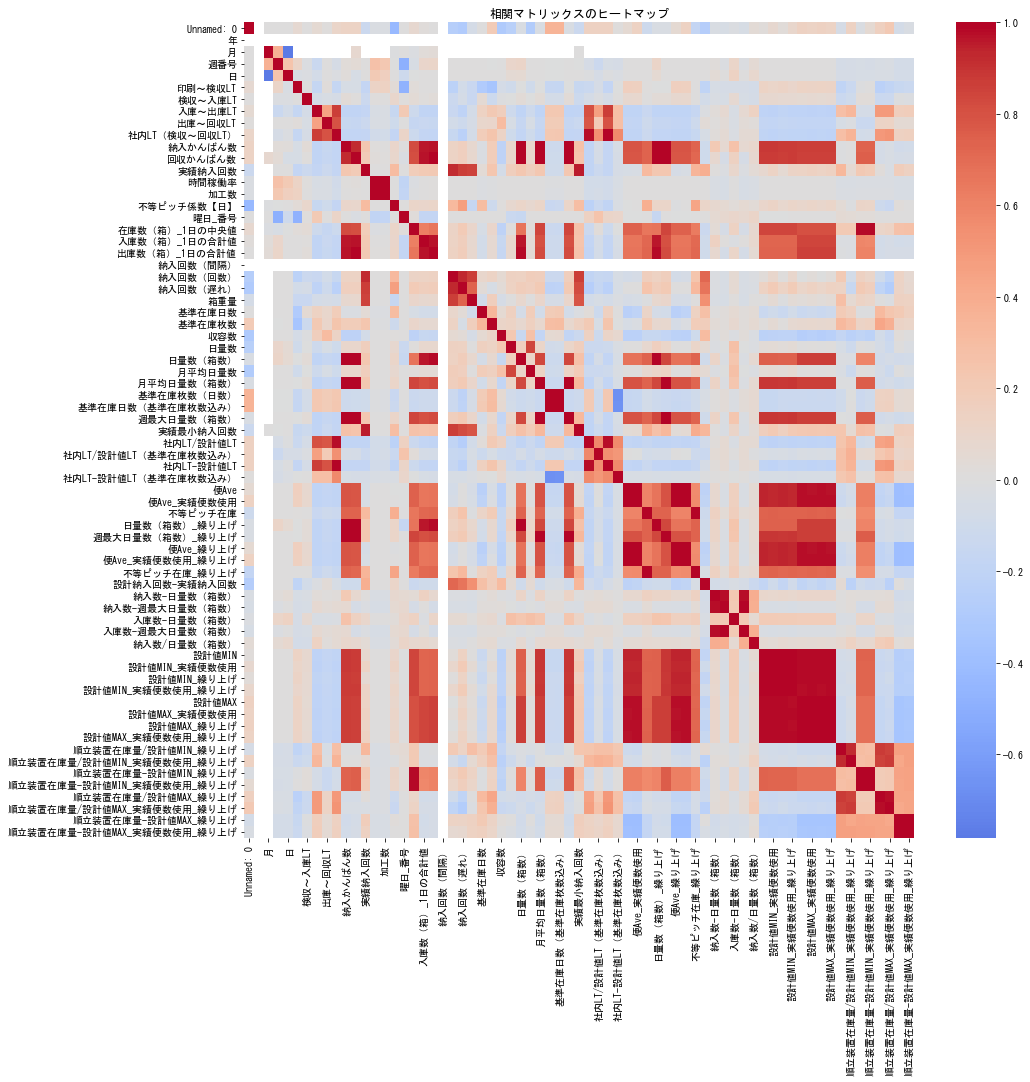

In [79]:
# ファイルパス
file_path = file_path_merged_daily_data_with_others

# CSVファイルを読み込む
# エンコーディングを指定してCSVファイルを再読み込み
df = pd.read_csv(file_path, encoding='cp932')

# 再度、数値列のみを使用して相関マトリックスを計算
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# 相関マトリックスの最初の数行を表示
correlation_matrix.head()

# フォント設定の変更（日本語対応のため）
mpl.rcParams['font.family'] = 'MS Gothic'

# 相関マトリックスをヒートマップとして表示
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('相関マトリックスのヒートマップ')
plt.show()

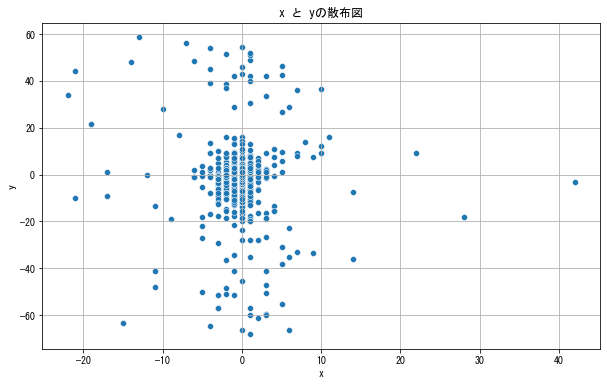

In [80]:
# 散布図を表示するために適当な2つの数値列を選択
# ここでは、例として '印刷～検収LT' と '検収～入庫LT' の2列を使用します

df = df[(df['仕入先名'] != "（株）ムロコーポレーション")]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='入庫数-週最大日量数（箱数）', y='順立装置在庫量-設計値MAX_実績便数使用_繰り上げ')
plt.title('x と yの散布図')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()